In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc

In [118]:
df = pd.read_csv("./data/totalrun.csv")
id_map = {
    0: "Belazzougui et al.",
    1: "LPF pruned s=1 DP",
    2: "LPF pruned s=1",
    3: "LPF pruned s=1 no cut",
    4: "LPF pruned s=z DP",
    5: "LPF pruned s=z",
    6: "LPF s=z",
    7: "LPF s=1",
    8: "LPF heuristic s=z",
    9: "FP pruned s=1",
    10: "FP pruned s=z",
    11: "FP s=z",
    12: "FP s=1",
    13: "wavelet tree",
}
df = df.groupby(['id','text_id','t','l']).mean().reset_index()
col_wrapping = 3
df['name'] = df["id"].replace(id_map)
df['text_id'] = df["text_id"].replace({"/workspace/dmeyer/data/" : ""}, regex=True)
df['bpS'] = df.apply(lambda row: row.treesize/ row.textsize * 8 , axis=1)
df['bpSrs'] = df.apply(lambda row: row.treesize_rs/ row.textsize * 8 , axis=1)
id = df['name'].unique()
texts = df['text_id'].unique()
pal = dict(zip(id, sns.color_palette(cc.glasbey, len(id))))
dfmarkers = dict(zip(id,['o','v','^','<', '>', '8','s','p','*','h','X','P'] ))
theodict = [0,11,12,6,7]
theoonly = df[(df.id == 0) |(df.id == 11) | (df.id == 12) | (df.id == 6) | (df.id == 7)]
theo_only_s_1 = df[(df.id == 7) | (df.id == 12)]
theo_only_s_z = df[(df.id == 6) | (df.id == 11)]
theo_only_lpf = df[(df.id == 6) | (df.id == 7)]
theo_only_fp = df[(df.id == 11) | (df.id == 12)]
test_size_diff = theo_only_lpf[['id','text_id','t','l','bpS']]
lpf_time_diff = theo_only_lpf[['id','text_id','t','l','constr_time']]
fp_time_diff = theo_only_fp[['id','text_id','t','l','constr_time']]
test = theo_only_s_1[['id','text_id','t','l','constr_time']]
testz = theo_only_s_z[['id','text_id','t','l','constr_time']]
nowave = df[(df.id != 13)]
pruned = df[(df.id == 0) | (df.id == 1) |(df.id == 2) |(df.id == 3) |(df.id == 4) |(df.id == 5) |(df.id == 9)|(df.id == 8)  |(df.id == 10)]

In [127]:
maxS = []
minS = []
meanS = []
for t in texts:
    df_t = fp_time_diff[fp_time_diff.text_id == t].groupby(['id']).constr_time.agg(['max', 'min', 'count', 'median', 'mean']).transpose()
    df_t = df_t.reset_index()
    df_t['speed_up_s_1'] = df_t[12] / df_t[11]
    maxS.append(df_t['speed_up_s_1'].loc[0])
    minS.append(df_t['speed_up_s_1'].loc[1])
    meanS.append(df_t['speed_up_s_1'].loc[4])
    print(t)
    print(df_t)
    print('===========')
print(max(maxS))
print(min(maxS))
print(min(minS))
print(0 if len(meanS) == 0 else sum(meanS)/len(meanS))

Escherichia_Coli
id   index            11             12  speed_up_s_1
0      max  86232.000000  205423.000000      2.382213
1      min  28764.000000   40833.000000      1.419587
2    count     12.000000      12.000000      1.000000
3   median  53911.000000   84666.000000      1.570477
4     mean  52217.416667  103301.333333      1.978293
cere
id   index             11             12  speed_up_s_1
0      max  373069.000000  802733.000000      2.151701
1      min  172387.000000  187309.000000      1.086561
2    count      12.000000      12.000000      1.000000
3   median  234280.500000  350191.000000      1.494751
4     mean  250487.916667  422385.166667      1.686250
coreutils
id   index             11             12  speed_up_s_1
0      max  122849.000000  288573.000000      2.349006
1      min   53229.000000   66121.000000      1.242199
2    count      12.000000      12.000000      1.000000
3   median   80242.500000  123372.500000      1.537496
4     mean   82060.583333  150243.91666

In [124]:
maxS = []
minS = []
meanS = []
for t in texts:
    df_t = lpf_time_diff[lpf_time_diff.text_id == t].groupby(['id']).constr_time.agg(['max', 'min', 'count', 'median', 'mean']).transpose()
    df_t = df_t.reset_index()
    df_t['speed_up_s_1'] = df_t[6] / df_t[7]
    maxS.append(df_t['speed_up_s_1'].loc[0])
    minS.append(df_t['speed_up_s_1'].loc[1])
    meanS.append(df_t['speed_up_s_1'].loc[4])
    print(t)
    print(df_t)
    print('===========')
print(max(maxS))
print(min(maxS))
print(min(minS))
print(0 if len(meanS) == 0 else sum(meanS)/len(meanS))

Escherichia_Coli
id   index             6         7  speed_up_s_1
0      max  17342.000000  17840.00      0.972085
1      min  15800.000000  15680.00      1.007653
2    count     12.000000     12.00      1.000000
3   median  16104.000000  16033.00      1.004428
4     mean  16314.833333  16267.25      1.002925
cere
id   index             6             7  speed_up_s_1
0      max  74729.000000  73899.000000      1.011232
1      min  70623.000000  70748.000000      0.998233
2    count     12.000000     12.000000      1.000000
3   median  71399.000000  72262.000000      0.988057
4     mean  71894.416667  72156.083333      0.996374
coreutils
id   index             6             7  speed_up_s_1
0      max  27789.000000  27669.000000      1.004337
1      min  26371.000000  26242.000000      1.004916
2    count     12.000000     12.000000      1.000000
3   median  26804.000000  26679.000000      1.004685
4     mean  26836.333333  26760.333333      1.002840
einstein.en.txt
id   index            

In [117]:
maxS = []
minS = []
meanS = []
for t in texts:
    df_t = test_size_diff[test_size_diff.text_id == t].groupby(['id']).bpS.agg(['max', 'min', 'count', 'median', 'mean']).transpose()
    df_t = df_t.reset_index()
    df_t['speed_up_s_1'] = df_t[6] / df_t[7]
    maxS.append(df_t['speed_up_s_1'].loc[0])
    minS.append(df_t['speed_up_s_1'].loc[1])
    meanS.append(df_t['speed_up_s_1'].loc[4])
    print(t)
    print(df_t)
    print('===========')
print(max(maxS))
print(min(maxS))
print(min(minS))
print(0 if len(meanS) == 0 else sum(meanS)/len(meanS))

Escherichia_Coli
id   index          6          7  speed_up_s_1
0      max   5.181895   5.170145      1.002273
1      min   2.351529   2.197124      1.070276
2    count  12.000000  12.000000      1.000000
3   median   2.813424   2.801673      1.004194
4     mean   3.180282   3.077942      1.033249
cere
id   index          6          7  speed_up_s_1
0      max   2.441292   2.441309      0.999993
1      min   0.546512   0.530219      1.030728
2    count  12.000000  12.000000      1.000000
3   median   0.845619   0.841805      1.004531
4     mean   0.967501   0.960715      1.007063
coreutils
id   index          6          7  speed_up_s_1
0      max   2.187083   2.129435      1.027072
1      min   0.816413   0.745429      1.095225
2    count  12.000000  12.000000      1.000000
3   median   1.114100   1.056453      1.054567
4     mean   1.233553   1.177467      1.047634
einstein.en.txt
id   index          6          7  speed_up_s_1
0      max   0.125530   0.125530      1.000000
1      min  

In [114]:
maxS = []
minS = []
meanS = []
for t in texts:
    df_t = testz[testz.text_id == t].groupby(['id']).bpS.agg(['max', 'min', 'count', 'median', 'mean']).transpose()
    df_t = df_t.reset_index()
    df_t['speed_up_s_1'] = df_t[11] / df_t[6]
    maxS.append(df_t['speed_up_s_1'].loc[0])
    minS.append(df_t['speed_up_s_1'].loc[1])
    meanS.append(df_t['speed_up_s_1'].loc[4])
    print(t)
    print(df_t)
    print('===========')
print(max(maxS))
print(min(maxS))
print(min(minS))
print(0 if len(meanS) == 0 else sum(meanS)/len(meanS))

Escherichia_Coli
id   index          6         11  speed_up_s_1
0      max   5.181895   5.181895           1.0
1      min   2.351529   2.351529           1.0
2    count  12.000000  12.000000           1.0
3   median   2.813424   2.813424           1.0
4     mean   3.180282   3.180282           1.0
cere
id   index          6         11  speed_up_s_1
0      max   2.441292   2.441292           1.0
1      min   0.546512   0.546512           1.0
2    count  12.000000  12.000000           1.0
3   median   0.845619   0.845619           1.0
4     mean   0.967501   0.967501           1.0
coreutils
id   index          6         11  speed_up_s_1
0      max   2.187083   2.187083           1.0
1      min   0.816413   0.816413           1.0
2    count  12.000000  12.000000           1.0
3   median   1.114100   1.114100           1.0
4     mean   1.233553   1.233553           1.0
einstein.en.txt
id   index          6         11  speed_up_s_1
0      max   0.125530   0.125530      1.000000
1      min  

In [108]:
maxS = []
minS = []
meanS = []
for t in texts:
    df_t = test[test.text_id == t].groupby(['id']).constr_time.agg(['max', 'min', 'count', 'median', 'mean']).transpose()
    df_t = df_t.reset_index()
    df_t['speed_up_s_1'] = df_t[12] / df_t[7]
    maxS.append(df_t['speed_up_s_1'].loc[0])
    minS.append(df_t['speed_up_s_1'].loc[1])
    meanS.append(df_t['speed_up_s_1'].loc[4])
    print(t)
    print(df_t)
    print('===========')
print(max(maxS))
print(min(maxS))
print(min(minS))
print(0 if len(meanS) == 0 else sum(meanS)/len(meanS))

Escherichia_Coli
id   index         7             12  speed_up_s_1
0      max  17840.00  205423.000000     11.514742
1      min  15680.00   40833.000000      2.604145
2    count     12.00      12.000000      1.000000
3   median  16033.00   84666.000000      5.280733
4     mean  16267.25  103301.333333      6.350264
cere
id   index             7             12  speed_up_s_1
0      max  73899.000000  802733.000000     10.862569
1      min  70748.000000  187309.000000      2.647552
2    count     12.000000      12.000000      1.000000
3   median  72262.000000  350191.000000      4.846129
4     mean  72156.083333  422385.166667      5.853771
coreutils
id   index             7             12  speed_up_s_1
0      max  27669.000000  288573.000000     10.429470
1      min  26242.000000   66121.000000      2.519663
2    count     12.000000      12.000000      1.000000
3   median  26679.000000  123372.500000      4.624330
4     mean  26760.333333  150243.916667      5.614426
einstein.en.txt
id  

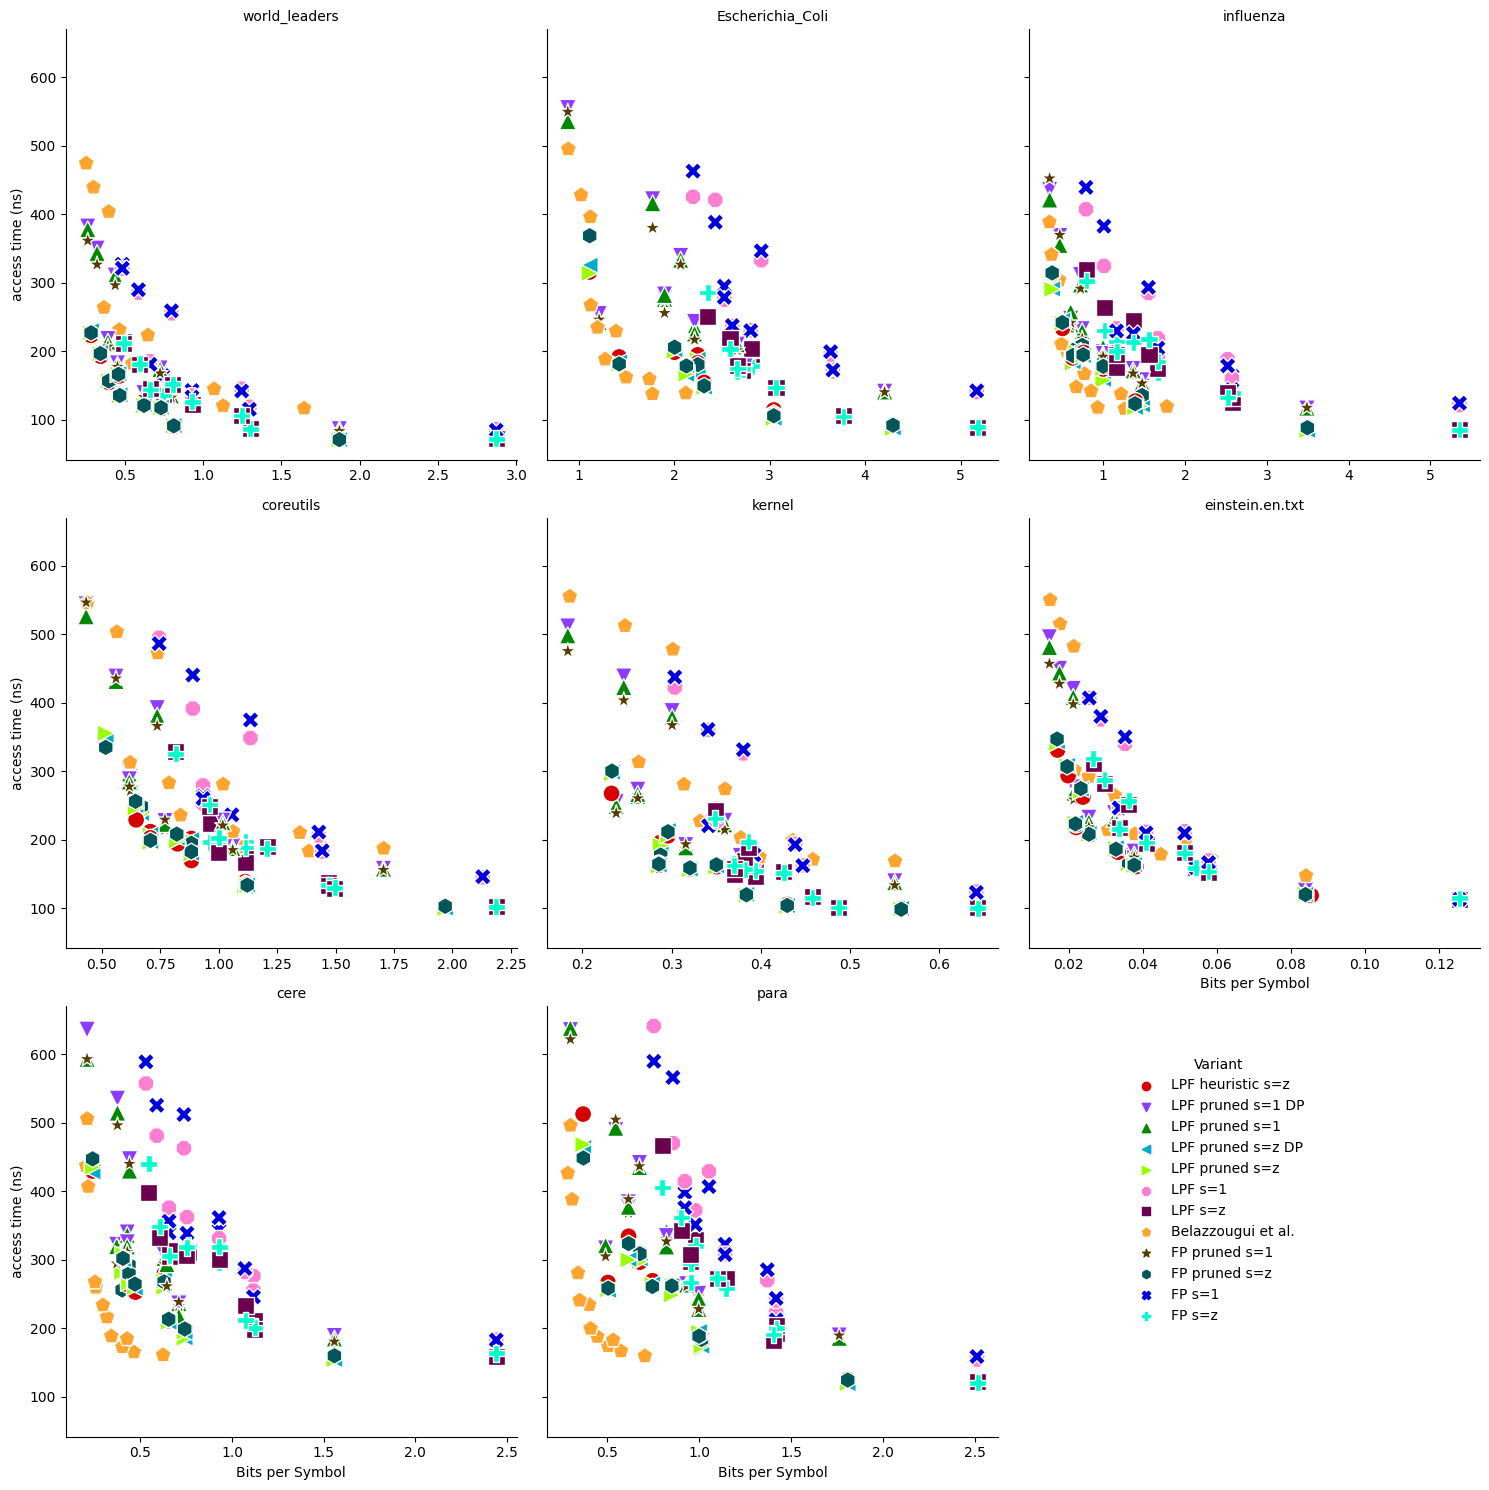

In [70]:
access_size = sns.relplot(y='access_avg', x='bpS', data=nowave, col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name',
                          s=150,facet_kws={'sharey': True, 'sharex': False,'legend_out' : False})
access_size.set_xlabels('Bits per Symbol')
access_size.set_ylabels('access time (ns)')
access_size.set_titles("{col_name}")
access_size._legend.set_title("Variant")
sns.move_legend(access_size, "upper left", bbox_to_anchor=(0.75, 0.3), frameon=False)
plt.savefig("access_size.pdf")

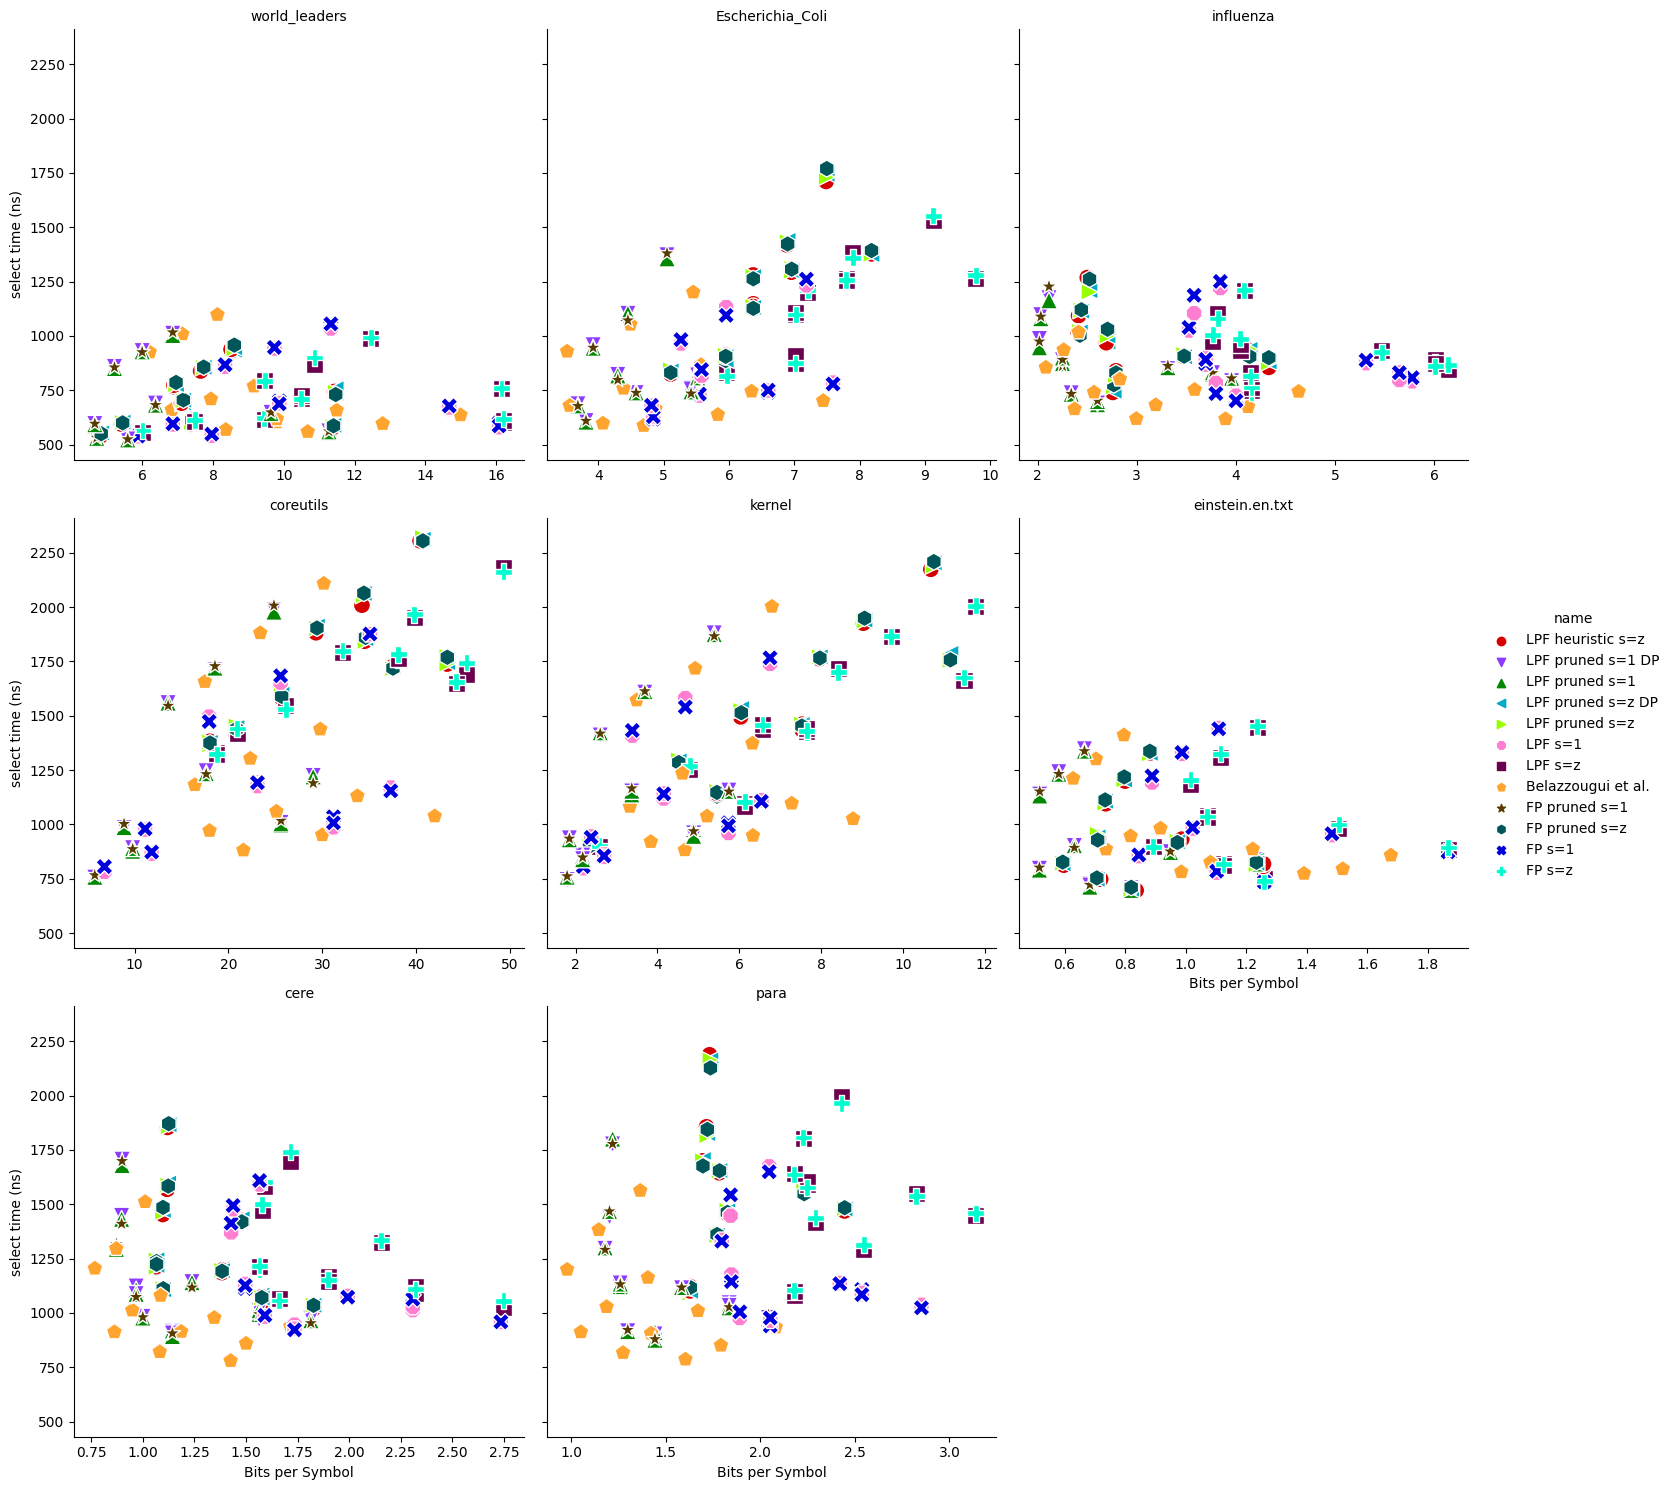

In [71]:
select_size = sns.relplot(y='select_avg', x='bpSrs', data=nowave, col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': True, 'sharex': False})
select_size.set_xlabels('Bits per Symbol')
select_size.set_ylabels('select time (ns)')
select_size.set_titles("{col_name}")
plt.savefig("select_size.pdf")

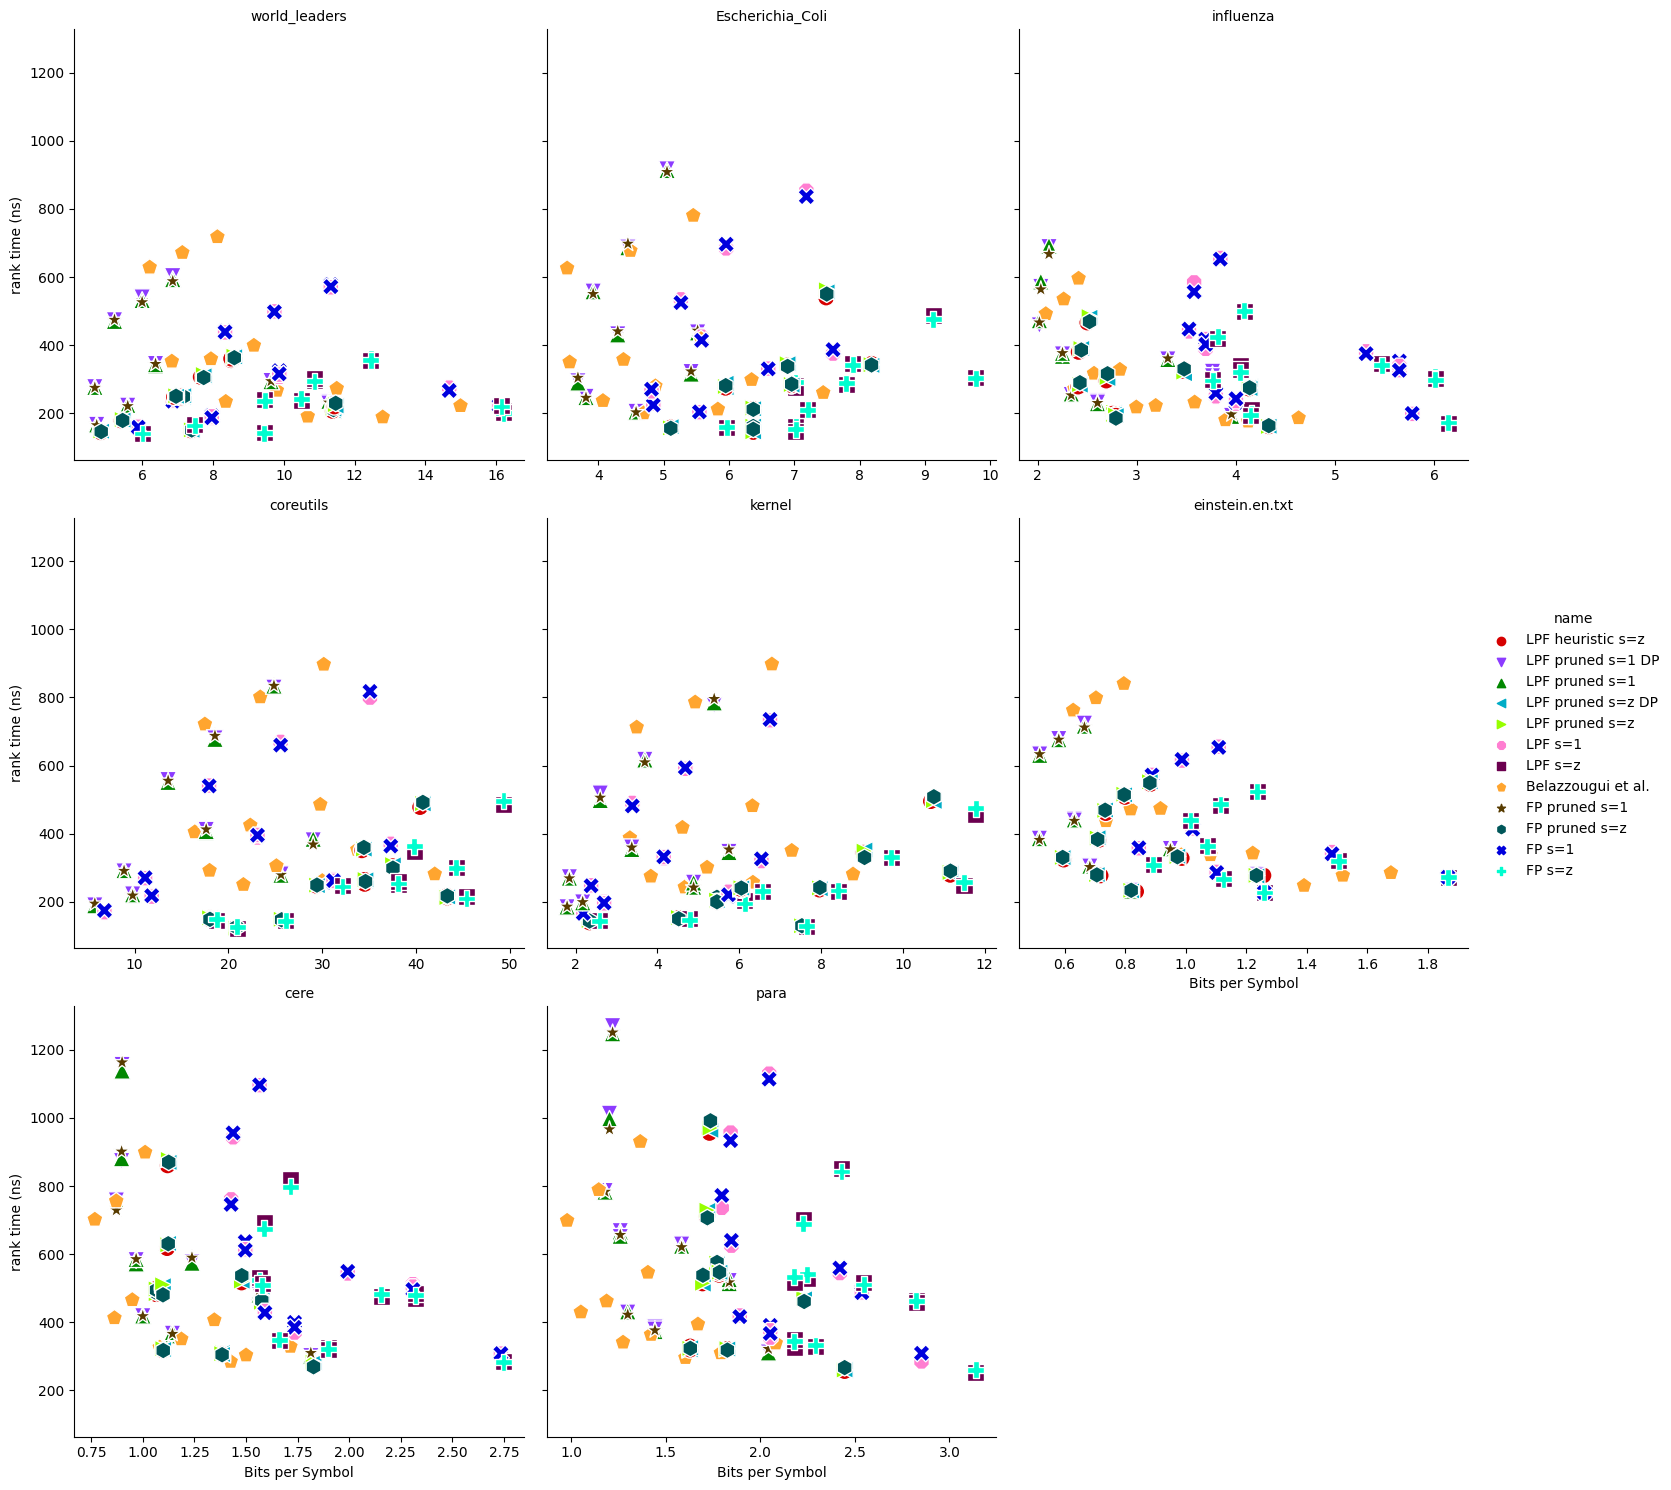

In [72]:
rank_size = sns.relplot(y='rank_avg', x='bpSrs', data=nowave, col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': True, 'sharex': False})
rank_size.set_xlabels('Bits per Symbol')
rank_size.set_ylabels('rank time (ns)')
rank_size.set_titles("{col_name}")
plt.savefig("rank_size.pdf")

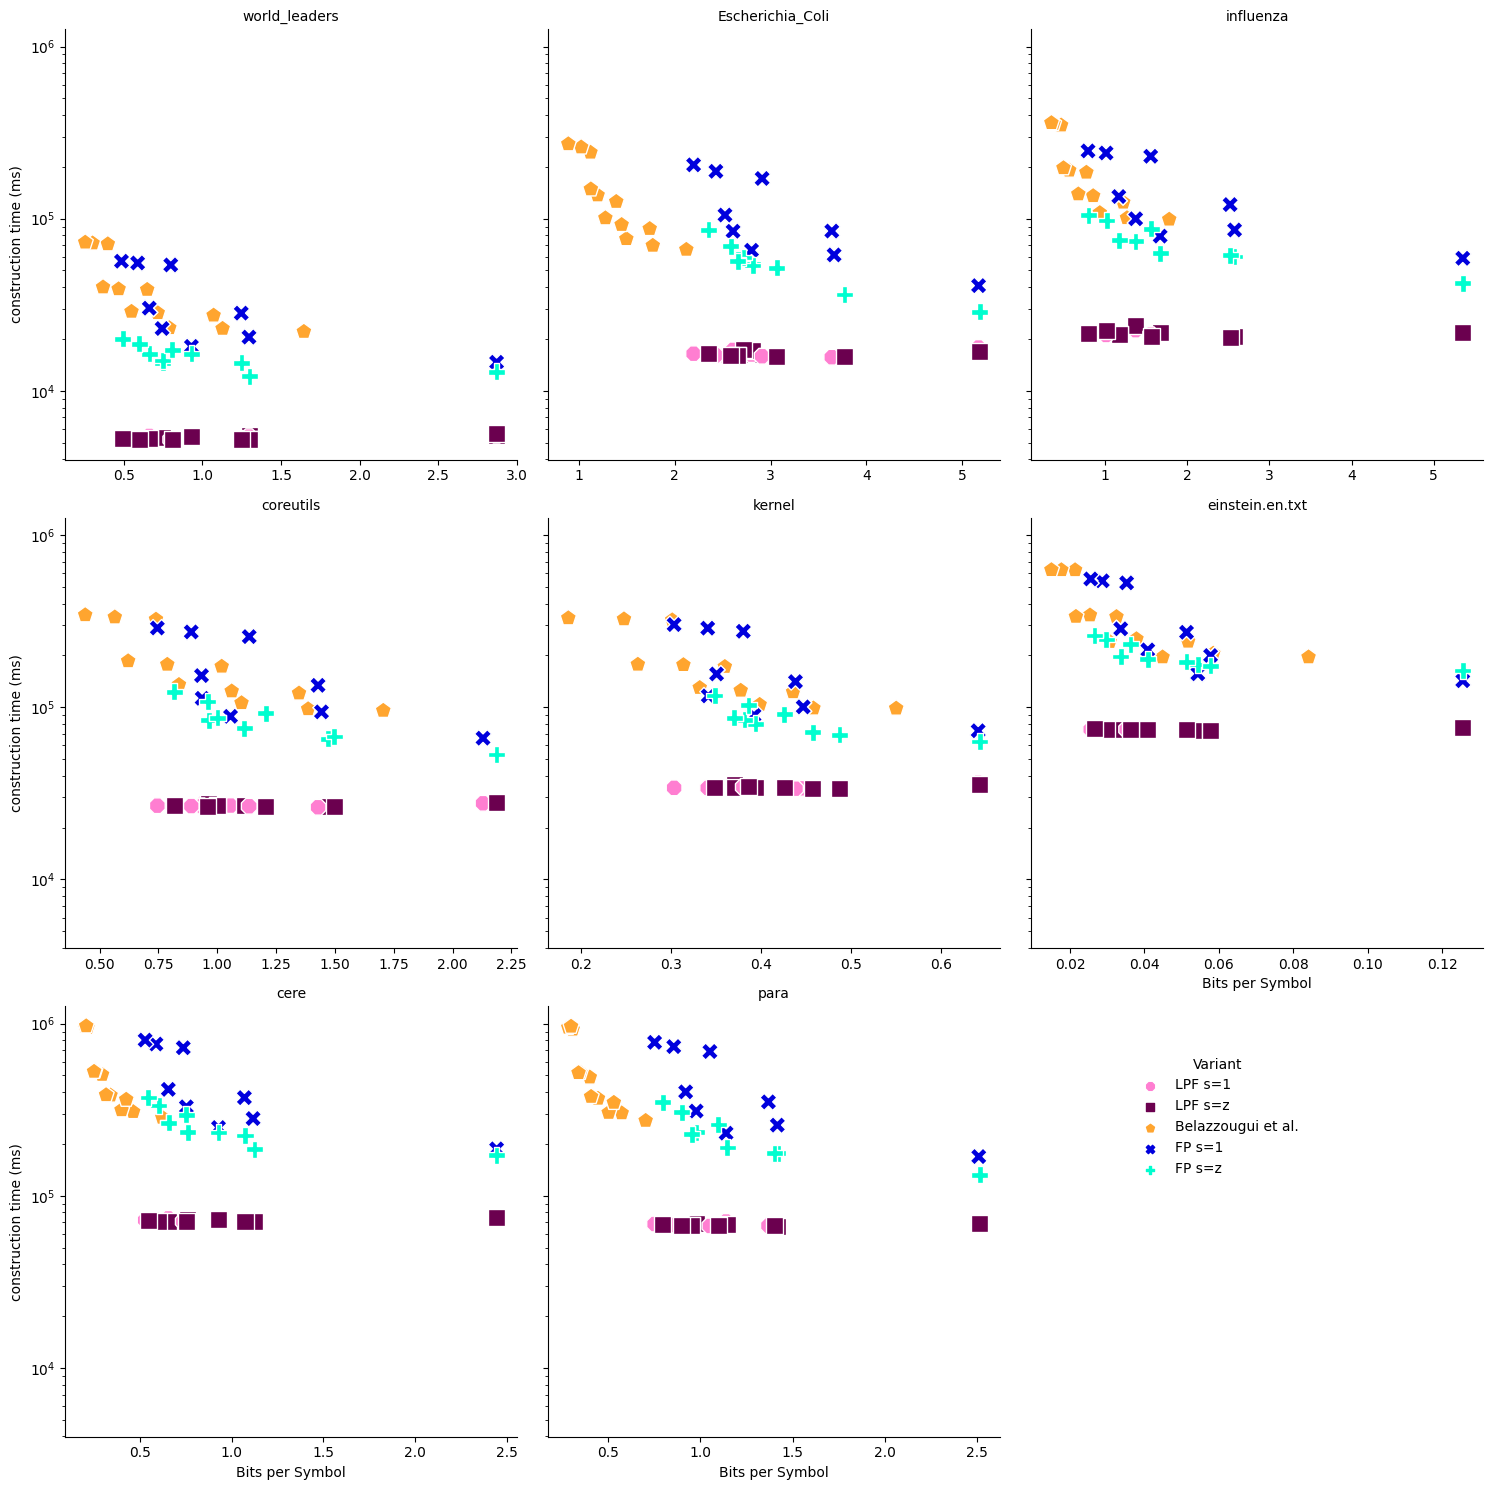

In [73]:
theo_speed_size_log = sns.relplot(y='constr_time', x='bpS', data=theoonly, col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': True, 'sharex': False, 'legend_out' : False})
theo_speed_size_log.set_xlabels('Bits per Symbol')
theo_speed_size_log.set_ylabels('construction time (ms)')
theo_speed_size_log.set(yscale="log")
theo_speed_size_log.set_titles("{col_name}")
theo_speed_size_log._legend.set_title("Variant")
sns.move_legend(theo_speed_size_log, "upper left", bbox_to_anchor=(0.75, 0.3), frameon=False)
plt.savefig("theo_speed_size_log.pdf")


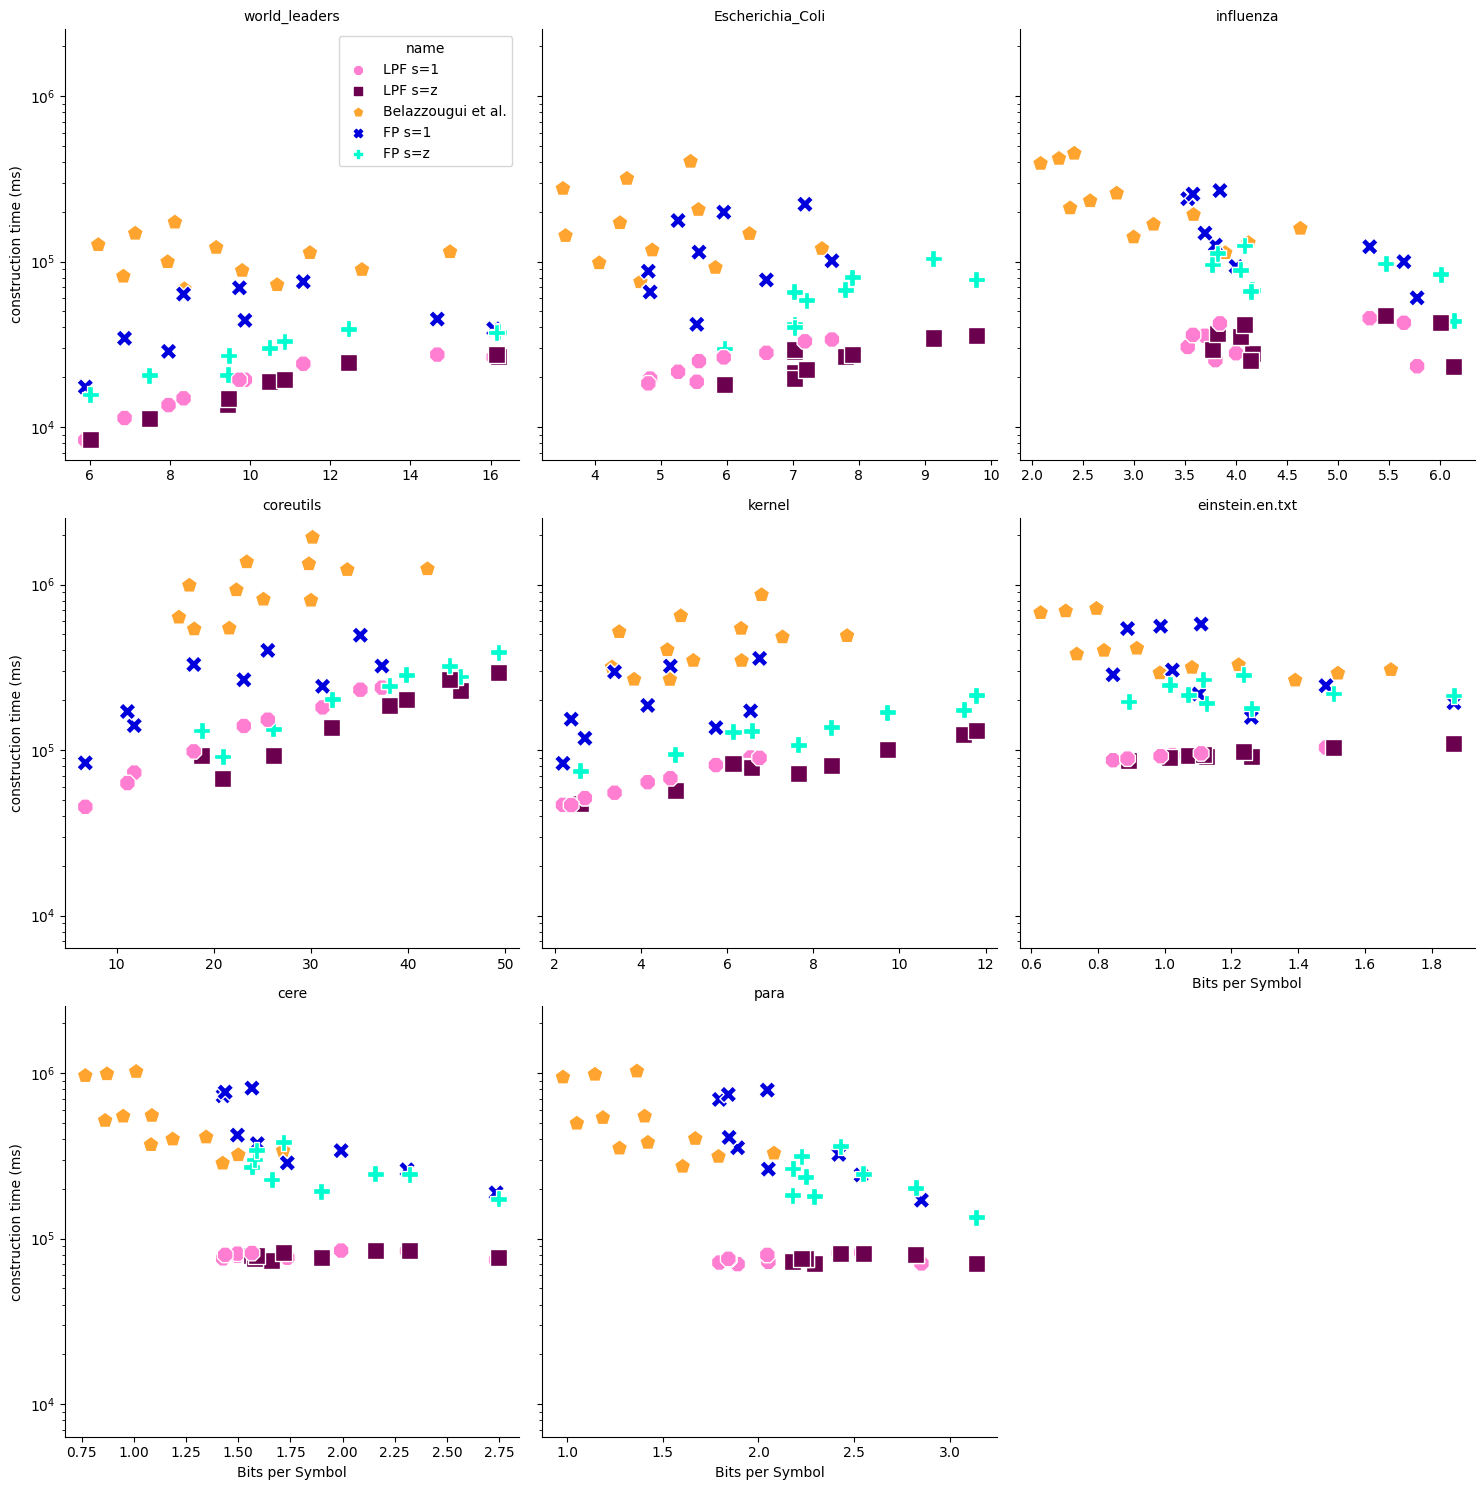

In [7]:
theo_speed_size_log_rs = sns.relplot(y='constr_time_rs', x='bpSrs', data=theoonly, col='text_id',
                                                  col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': True, 'sharex': False, 'legend_out' : False})
theo_speed_size_log_rs.set_xlabels('Bits per Symbol')
theo_speed_size_log_rs.set_ylabels('construction time (ms)')
theo_speed_size_log_rs.set(yscale="log")
theo_speed_size_log_rs.set_titles("{col_name}")
theo_speed_size_log._legend.set_title("Variant")
sns.move_legend(theo_speed_size_log, "upper left", bbox_to_anchor=(0.75, 0.3), frameon=False)
plt.savefig("theo_speed_size_log_rs.pdf")

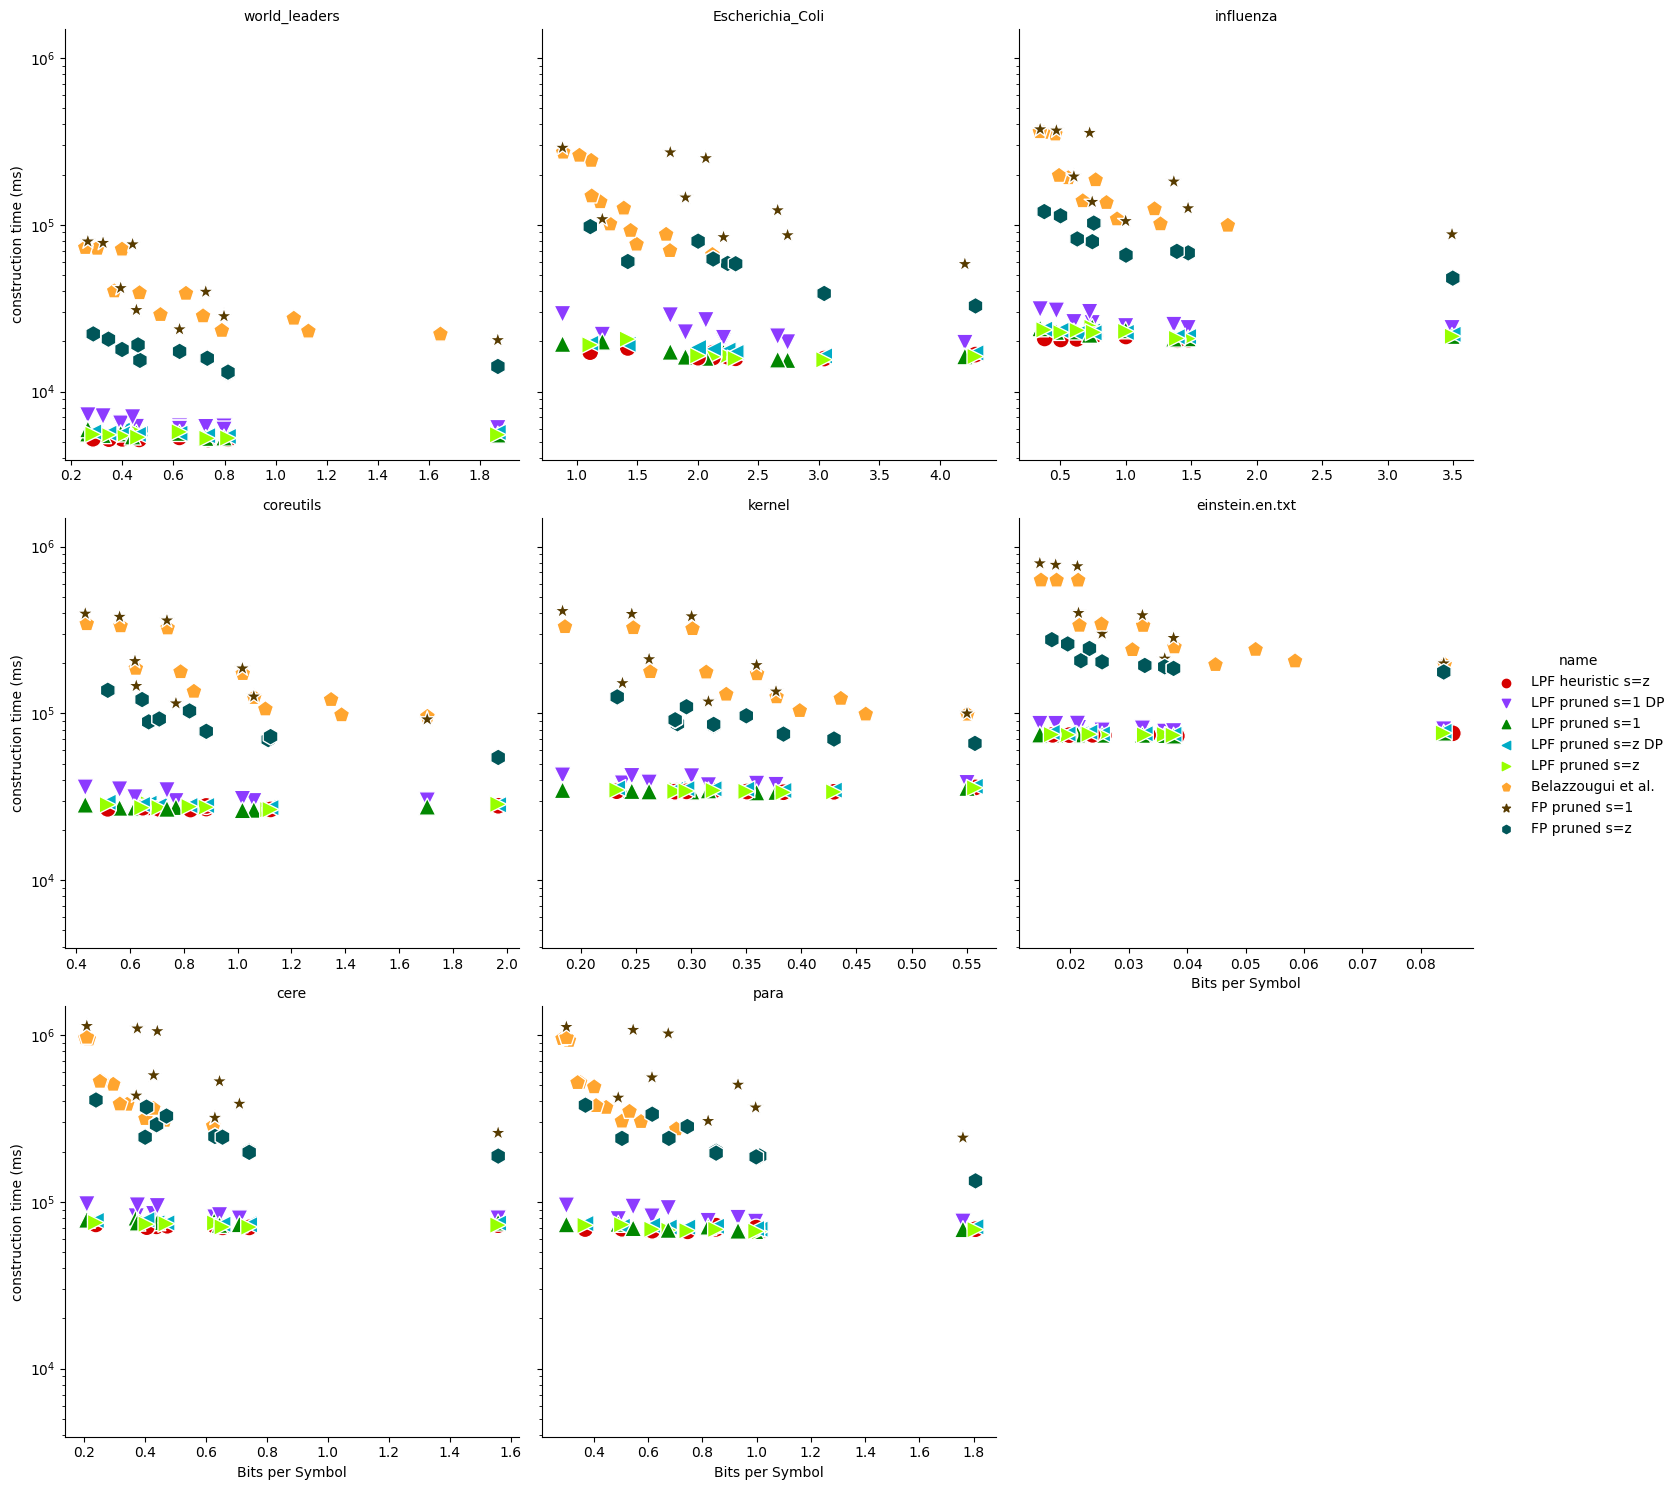

In [8]:
pruned_speed_size_log = sns.relplot(y='constr_time', x='bpS', data=pruned, col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': True, 'sharex': False})
pruned_speed_size_log.set_xlabels('Bits per Symbol')
pruned_speed_size_log.set_ylabels('construction time (ms)')
pruned_speed_size_log.set(yscale="log")
pruned_speed_size_log.set_titles("{col_name}")
plt.savefig("pruned_speed_size_log.pdf")

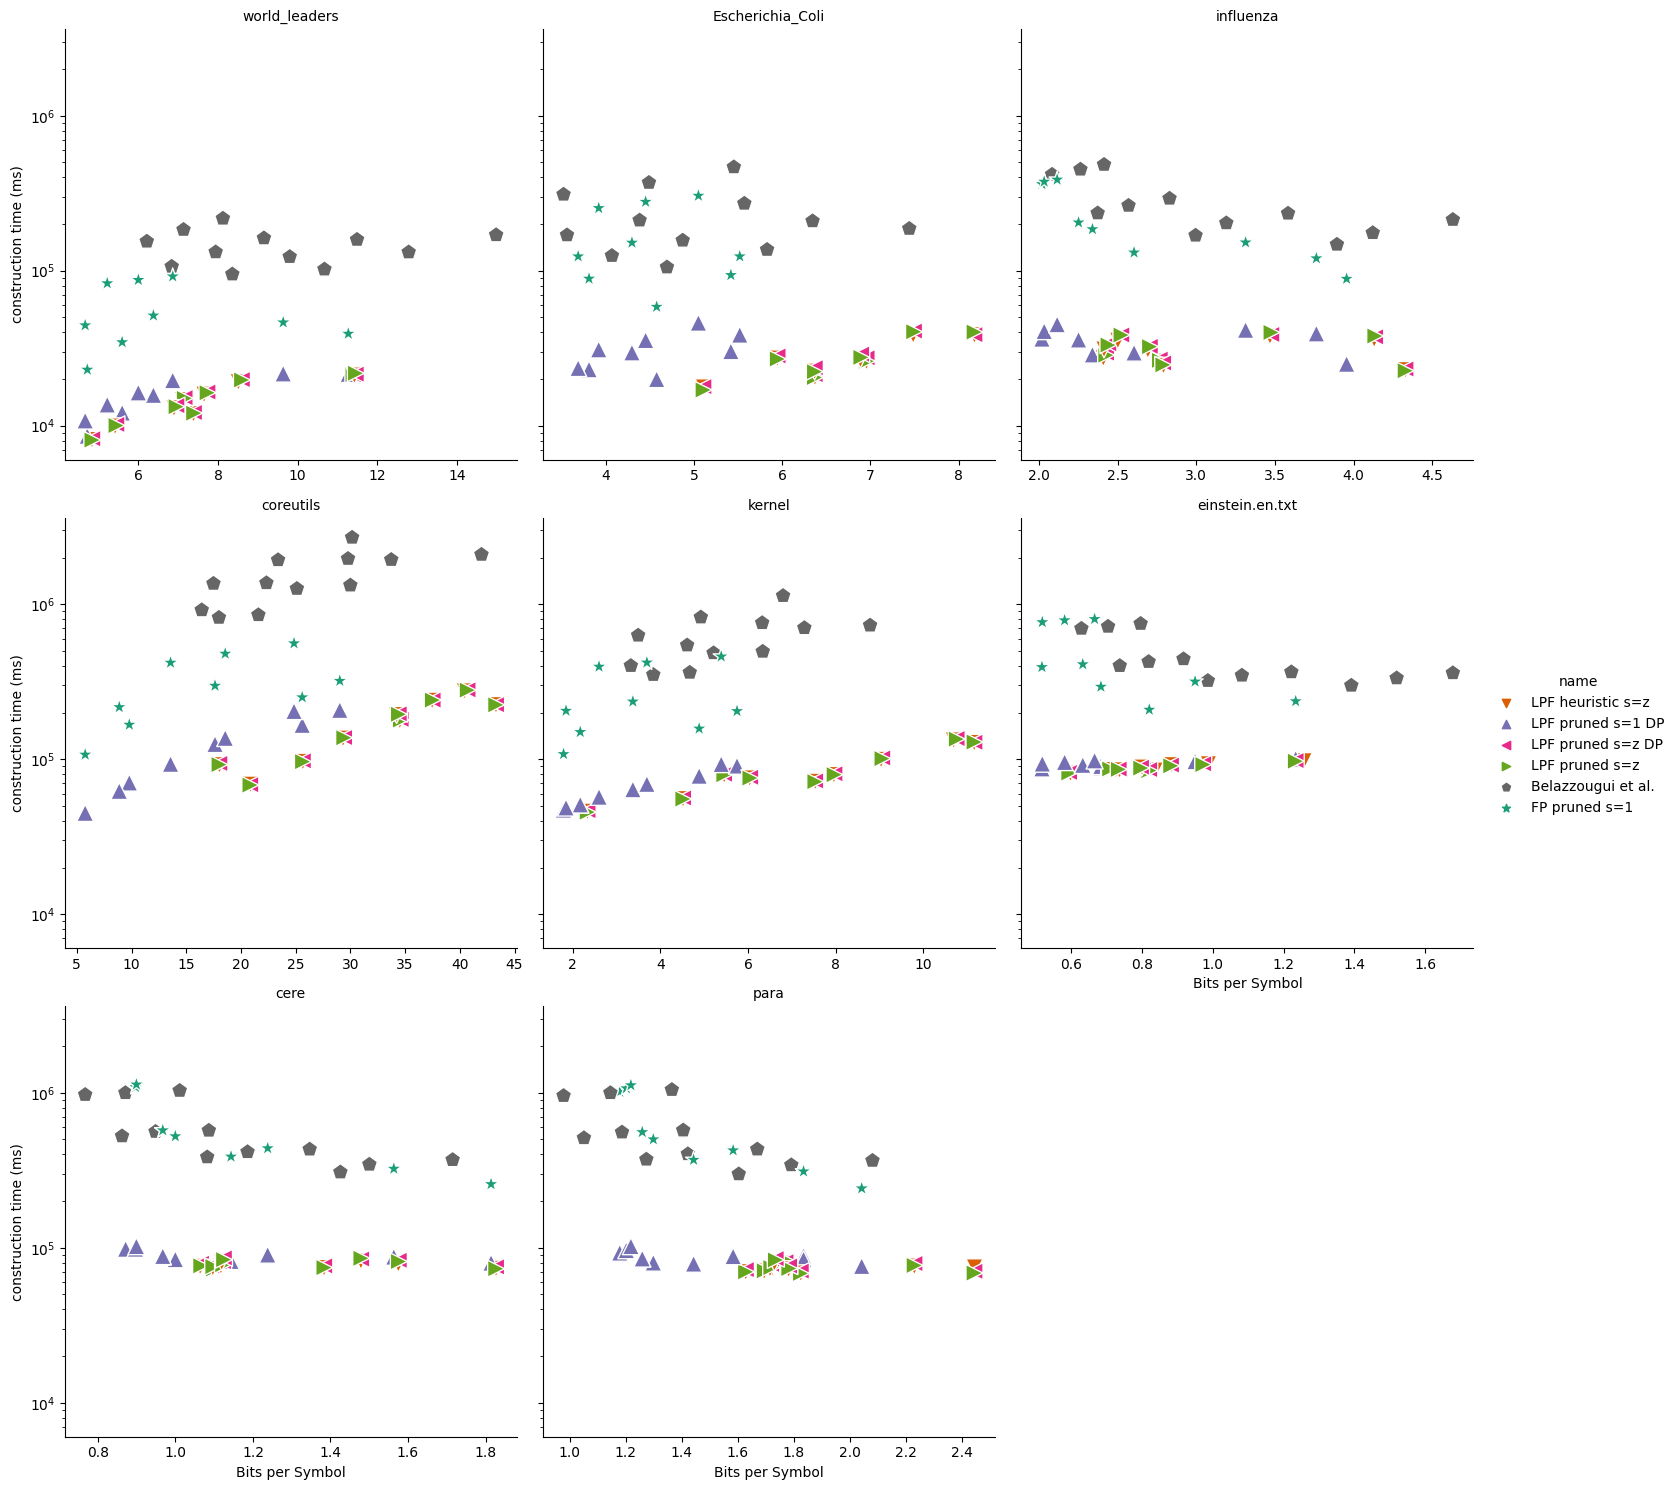

In [9]:
pruned_speed_size_log_rs = sns.relplot(y='constr_time_rs', x='bpSrs', data=pruned, col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': True, 'sharex': False})
pruned_speed_size_log_rs.set_xlabels('Bits per Symbol')
pruned_speed_size_log_rs.set_ylabels('construction time (ms)')
pruned_speed_size_log_rs.set(yscale="log")
pruned_speed_size_log_rs.set_titles("{col_name}")
plt.savefig("pruned_speed_size_log_rs.pdf")

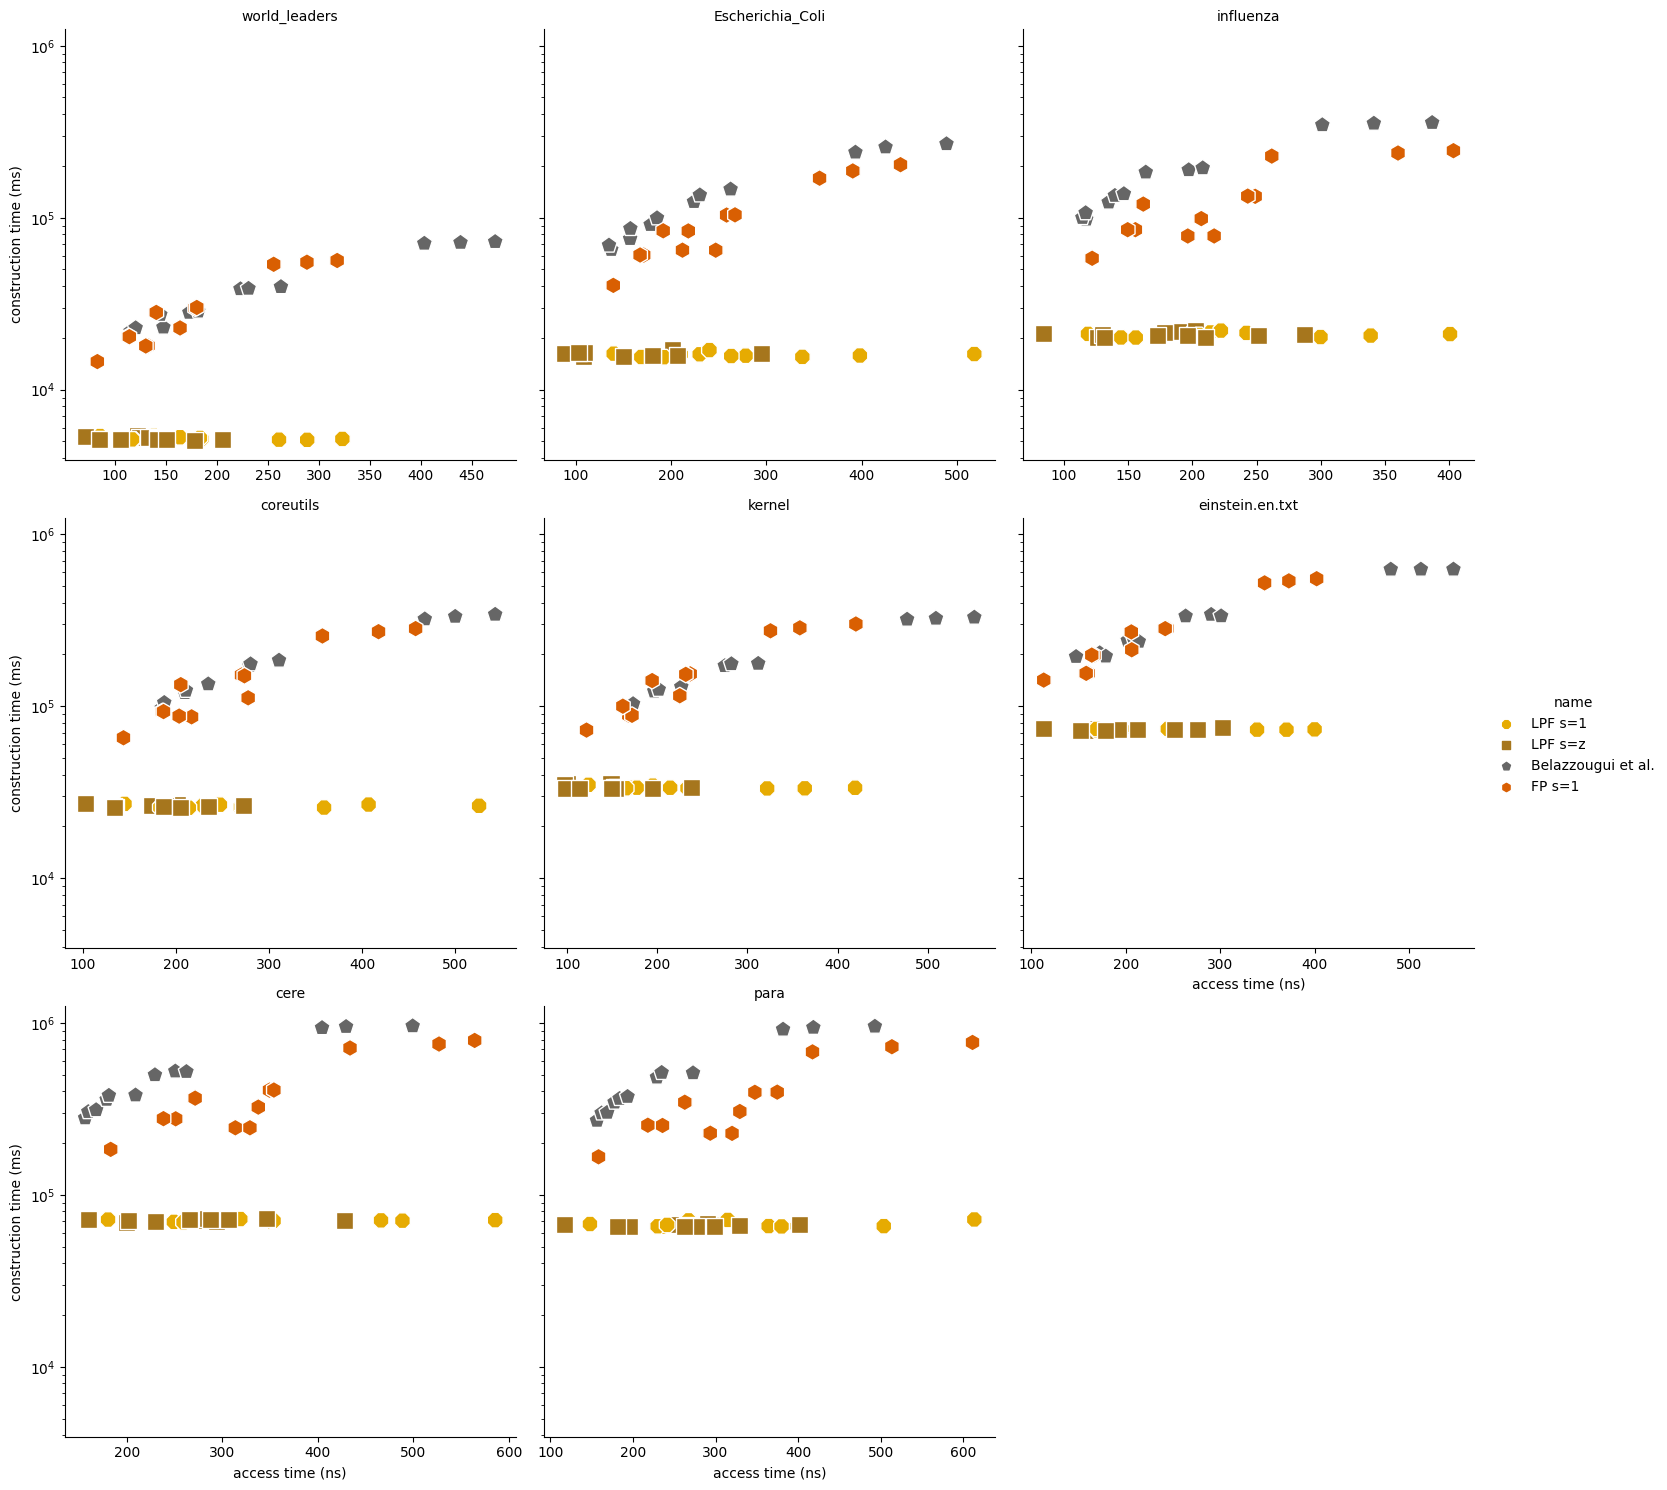

In [10]:
theo_speed_access_log = sns.relplot(y='constr_time', x='access_avg', data=theoonly, col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': True, 'sharex': False})
theo_speed_access_log.set_xlabels('access time (ns)')
theo_speed_access_log.set_ylabels('construction time (ms)')
theo_speed_access_log.set(yscale="log")
theo_speed_access_log.set_titles("{col_name}")
plt.savefig("theo_speed_access_log.pdf")

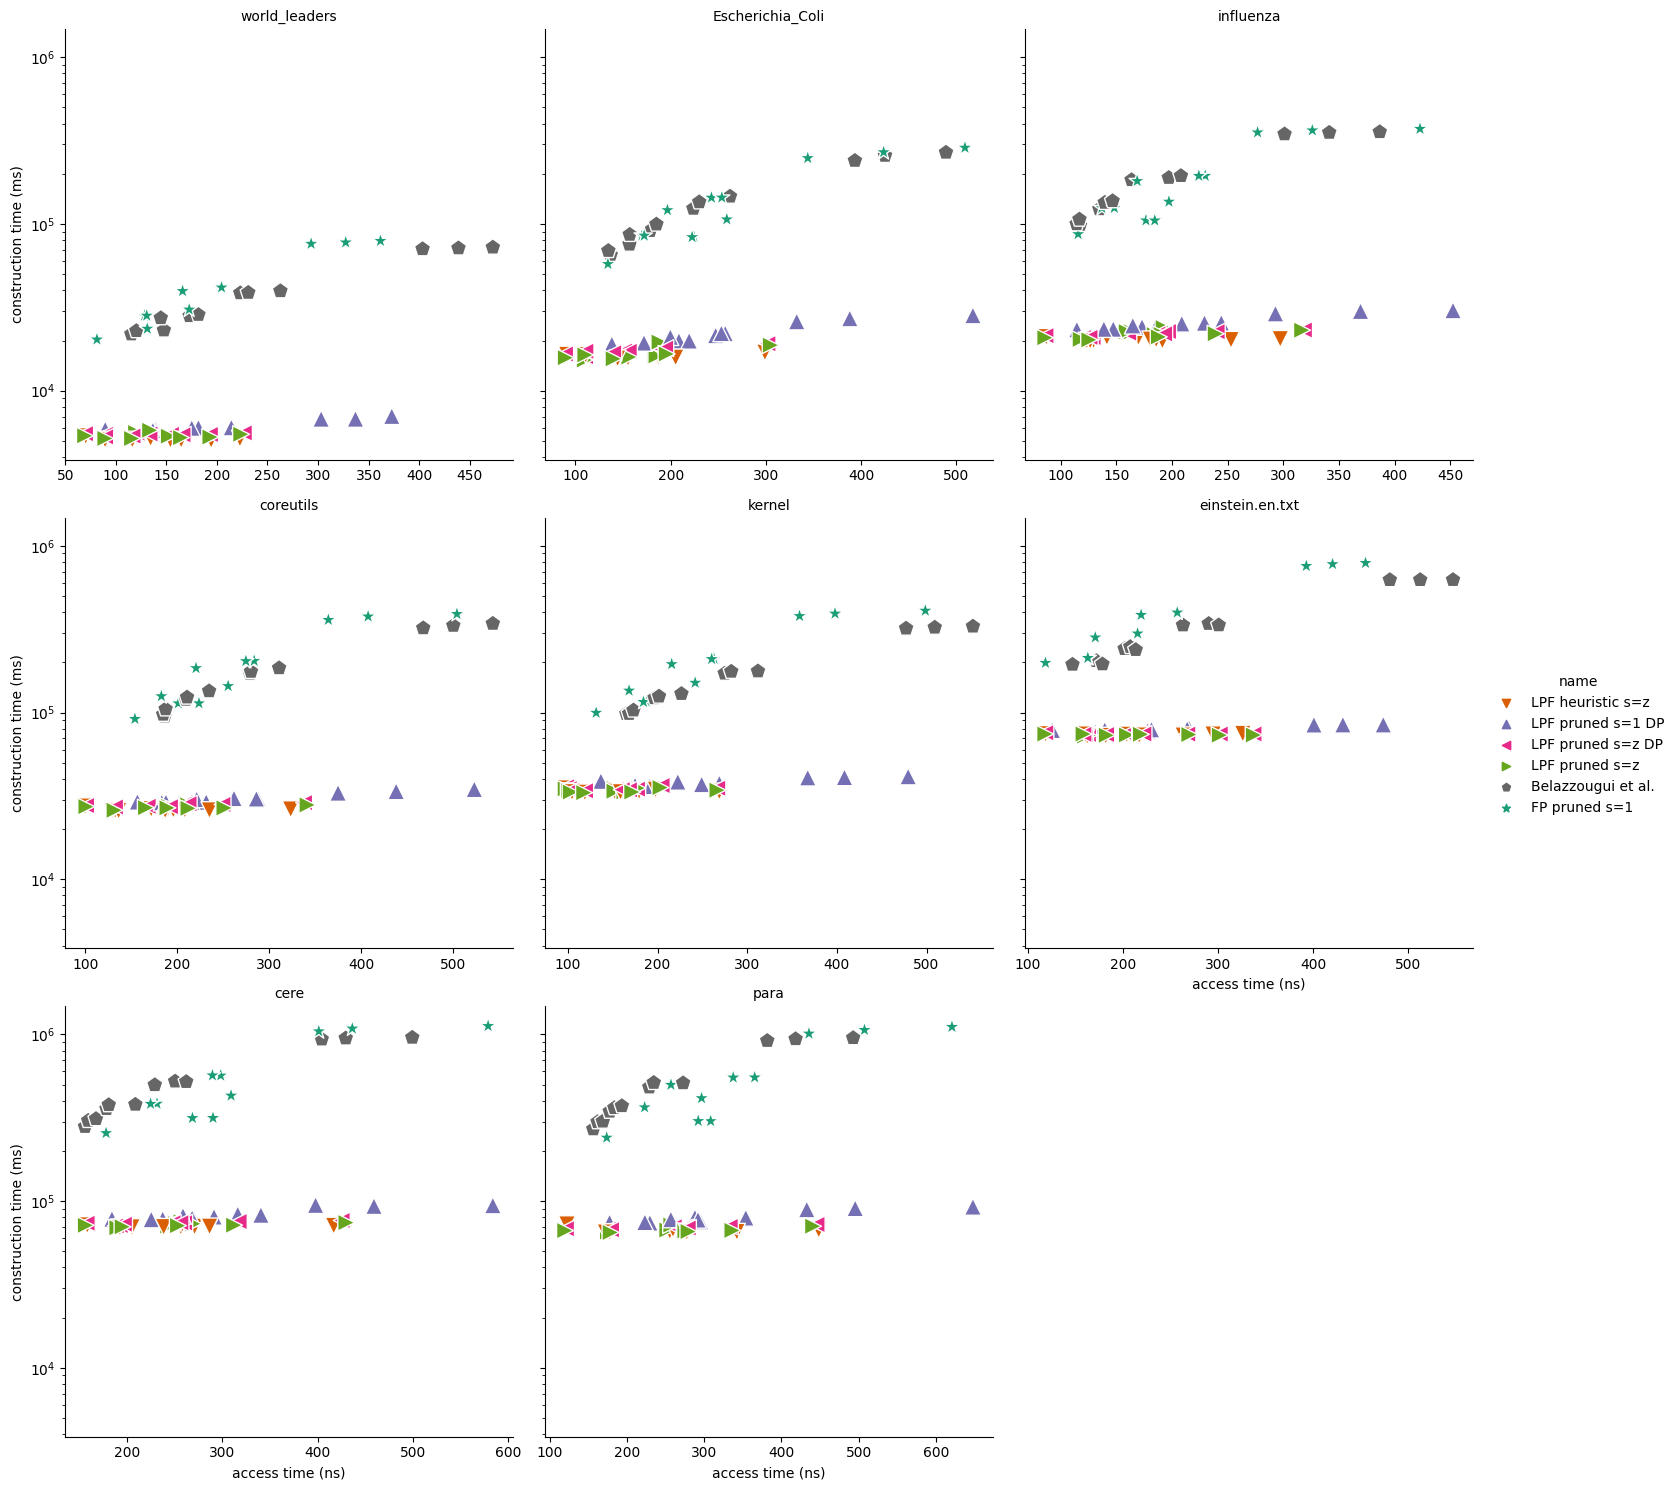

In [11]:
pruned_speed_access_log = sns.relplot(y='constr_time', x='access_avg', data=pruned, col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': True, 'sharex': False})
pruned_speed_access_log.set_xlabels('access time (ns)')
pruned_speed_access_log.set_ylabels('construction time (ms)')
pruned_speed_access_log.set(yscale="log")
pruned_speed_access_log.set_titles("{col_name}")
plt.savefig("pruned_speed_access_log.pdf")

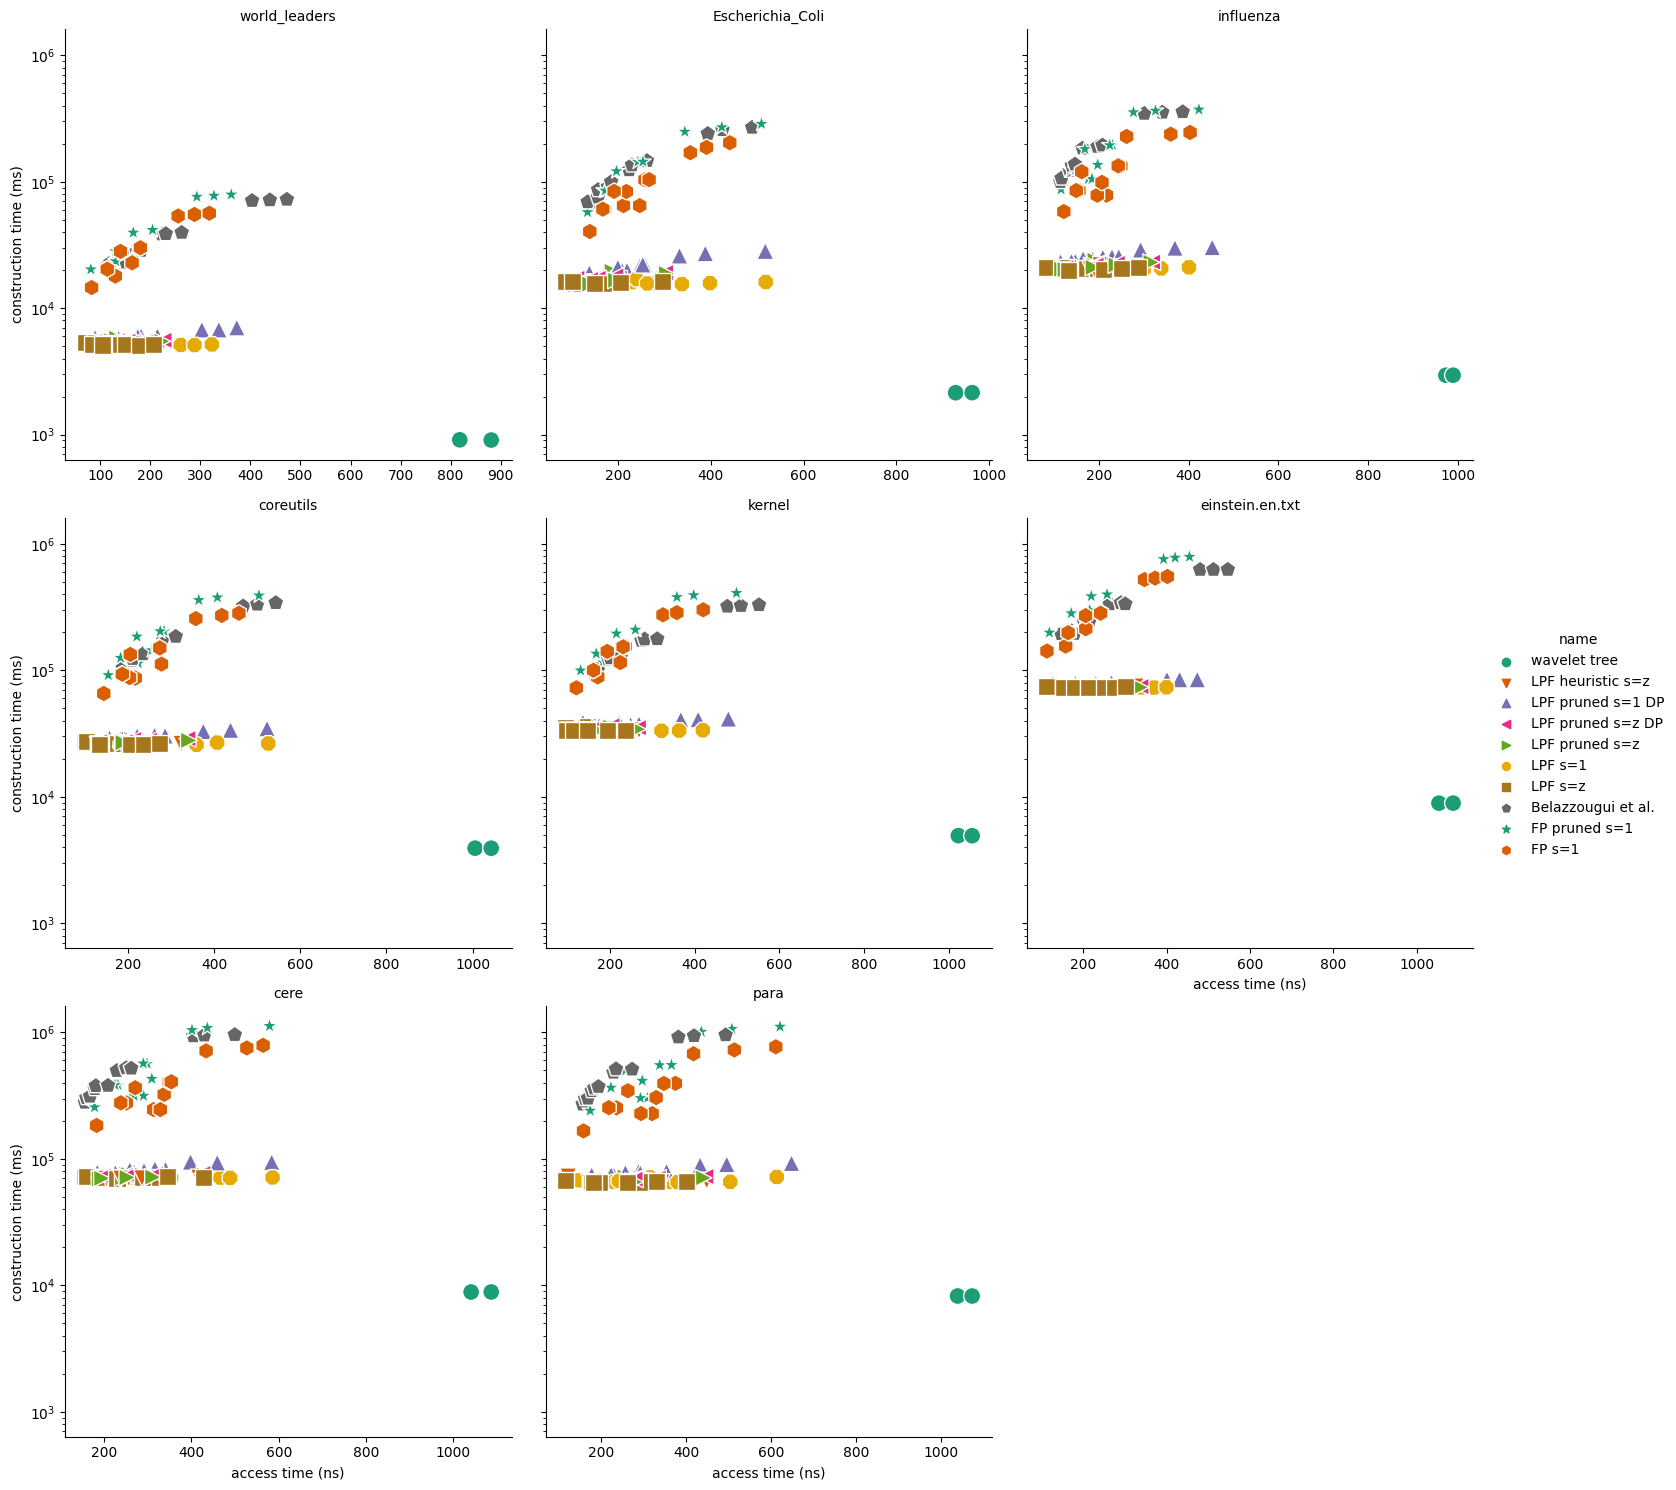

In [12]:
wavelet_speed_access_log = sns.relplot(y='constr_time', x='access_avg', data=df, col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': True, 'sharex': False})
wavelet_speed_access_log.set_xlabels('access time (ns)')
wavelet_speed_access_log.set_ylabels('construction time (ms)')
wavelet_speed_access_log.set(yscale="log")
wavelet_speed_access_log.set_titles("{col_name}")
plt.savefig("wavelet_speed_access_log.pdf")

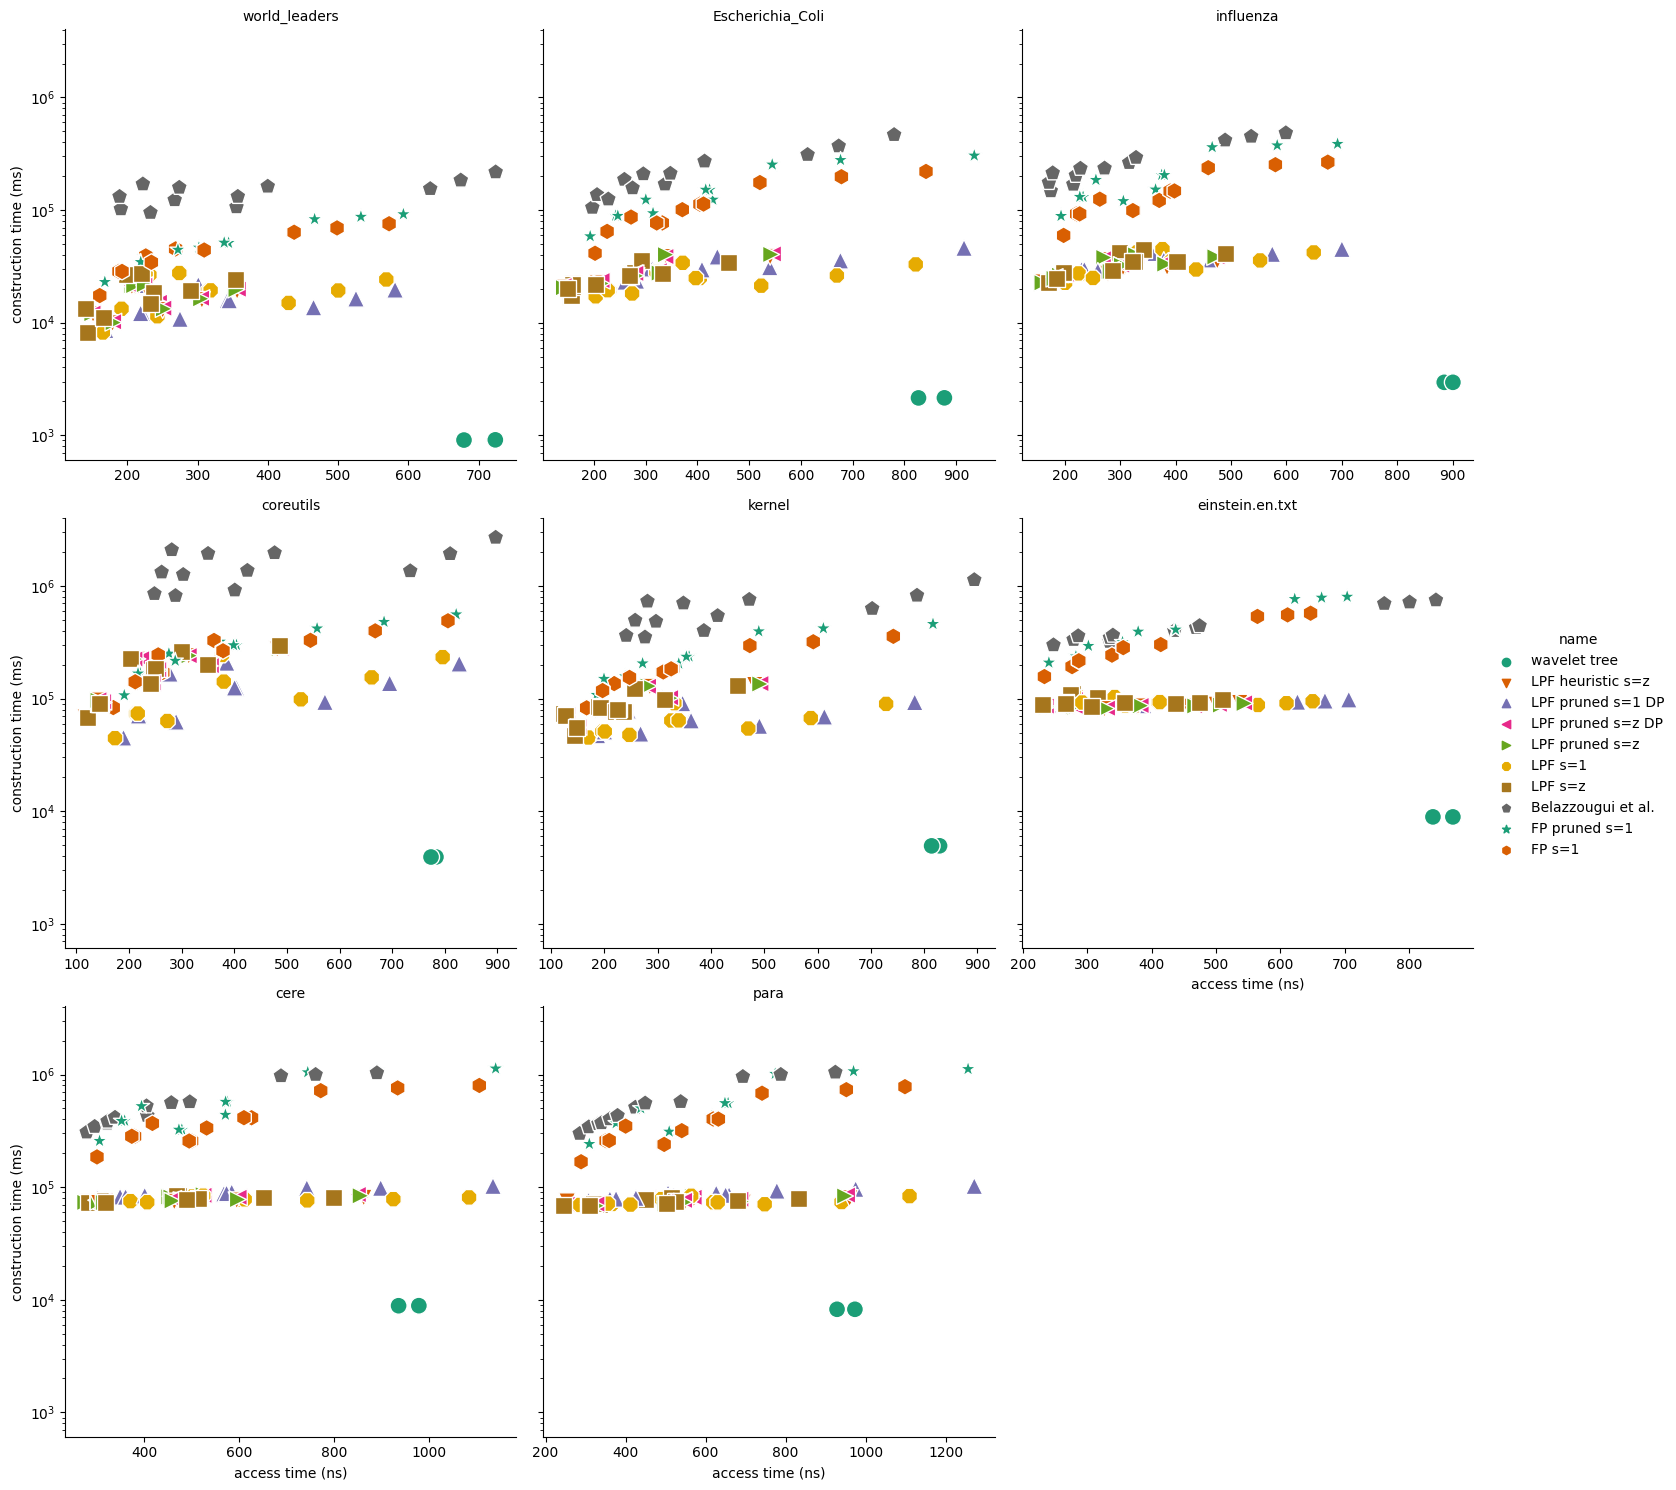

In [13]:
wavelet_speed_rank_log = sns.relplot(y='constr_time_rs', x='rank_avg', data=df, col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': True, 'sharex': False})
wavelet_speed_rank_log.set_xlabels('access time (ns)')
wavelet_speed_rank_log.set_ylabels('construction time (ms)')
wavelet_speed_rank_log.set(yscale="log")
wavelet_speed_rank_log.set_titles("{col_name}")
plt.savefig("wavelet_speed_access_log.pdf")

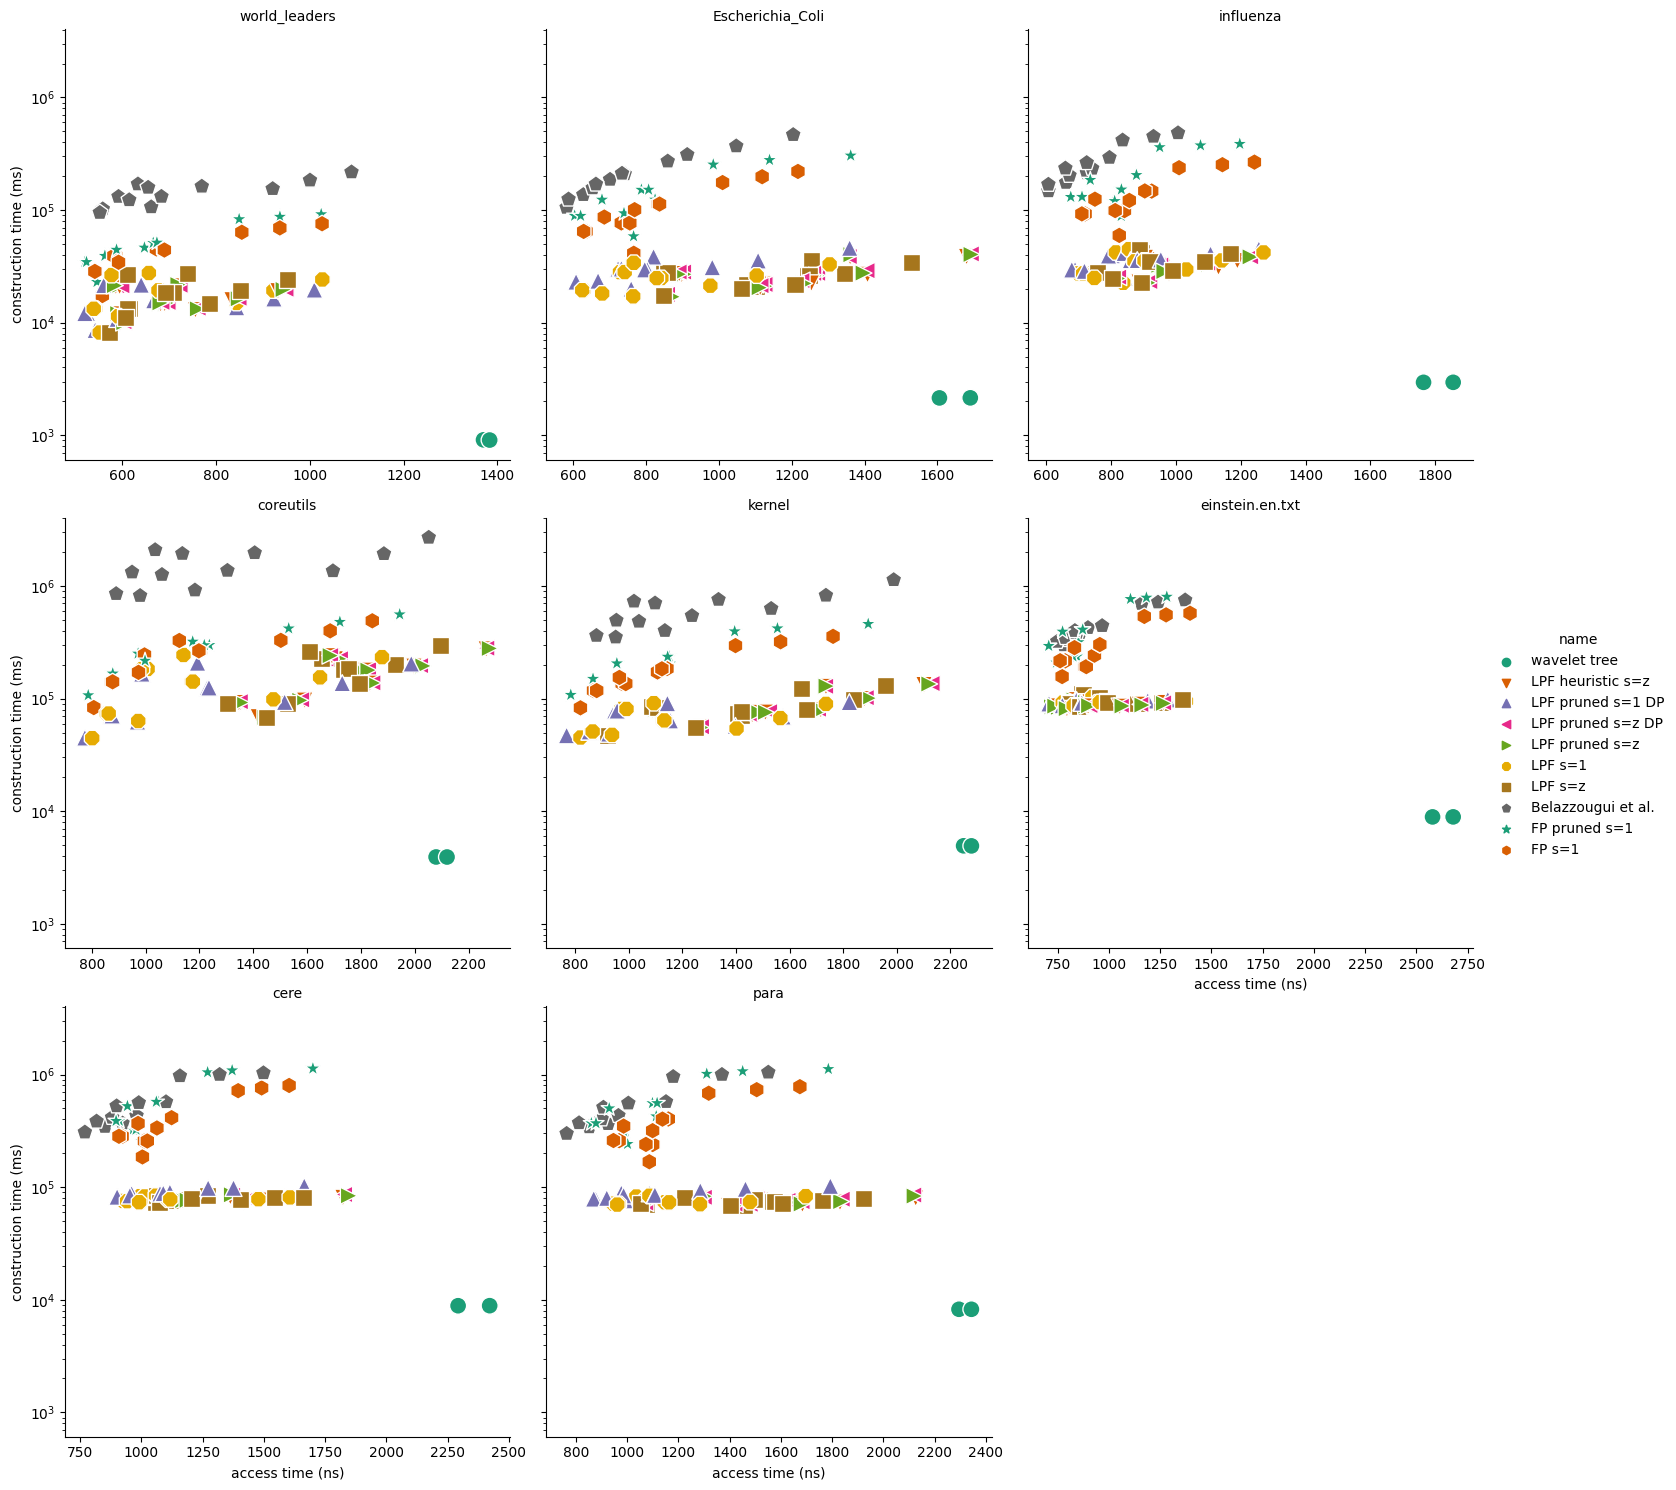

In [14]:
wavelet_speed_select_log = sns.relplot(y='constr_time_rs', x='select_avg', data=df, col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': True, 'sharex': False})
wavelet_speed_select_log.set_xlabels('access time (ns)')
wavelet_speed_select_log.set_ylabels('construction time (ms)')
wavelet_speed_select_log.set(yscale="log")
wavelet_speed_select_log.set_titles("{col_name}")
plt.savefig("wavelet_speed_access_log.pdf")

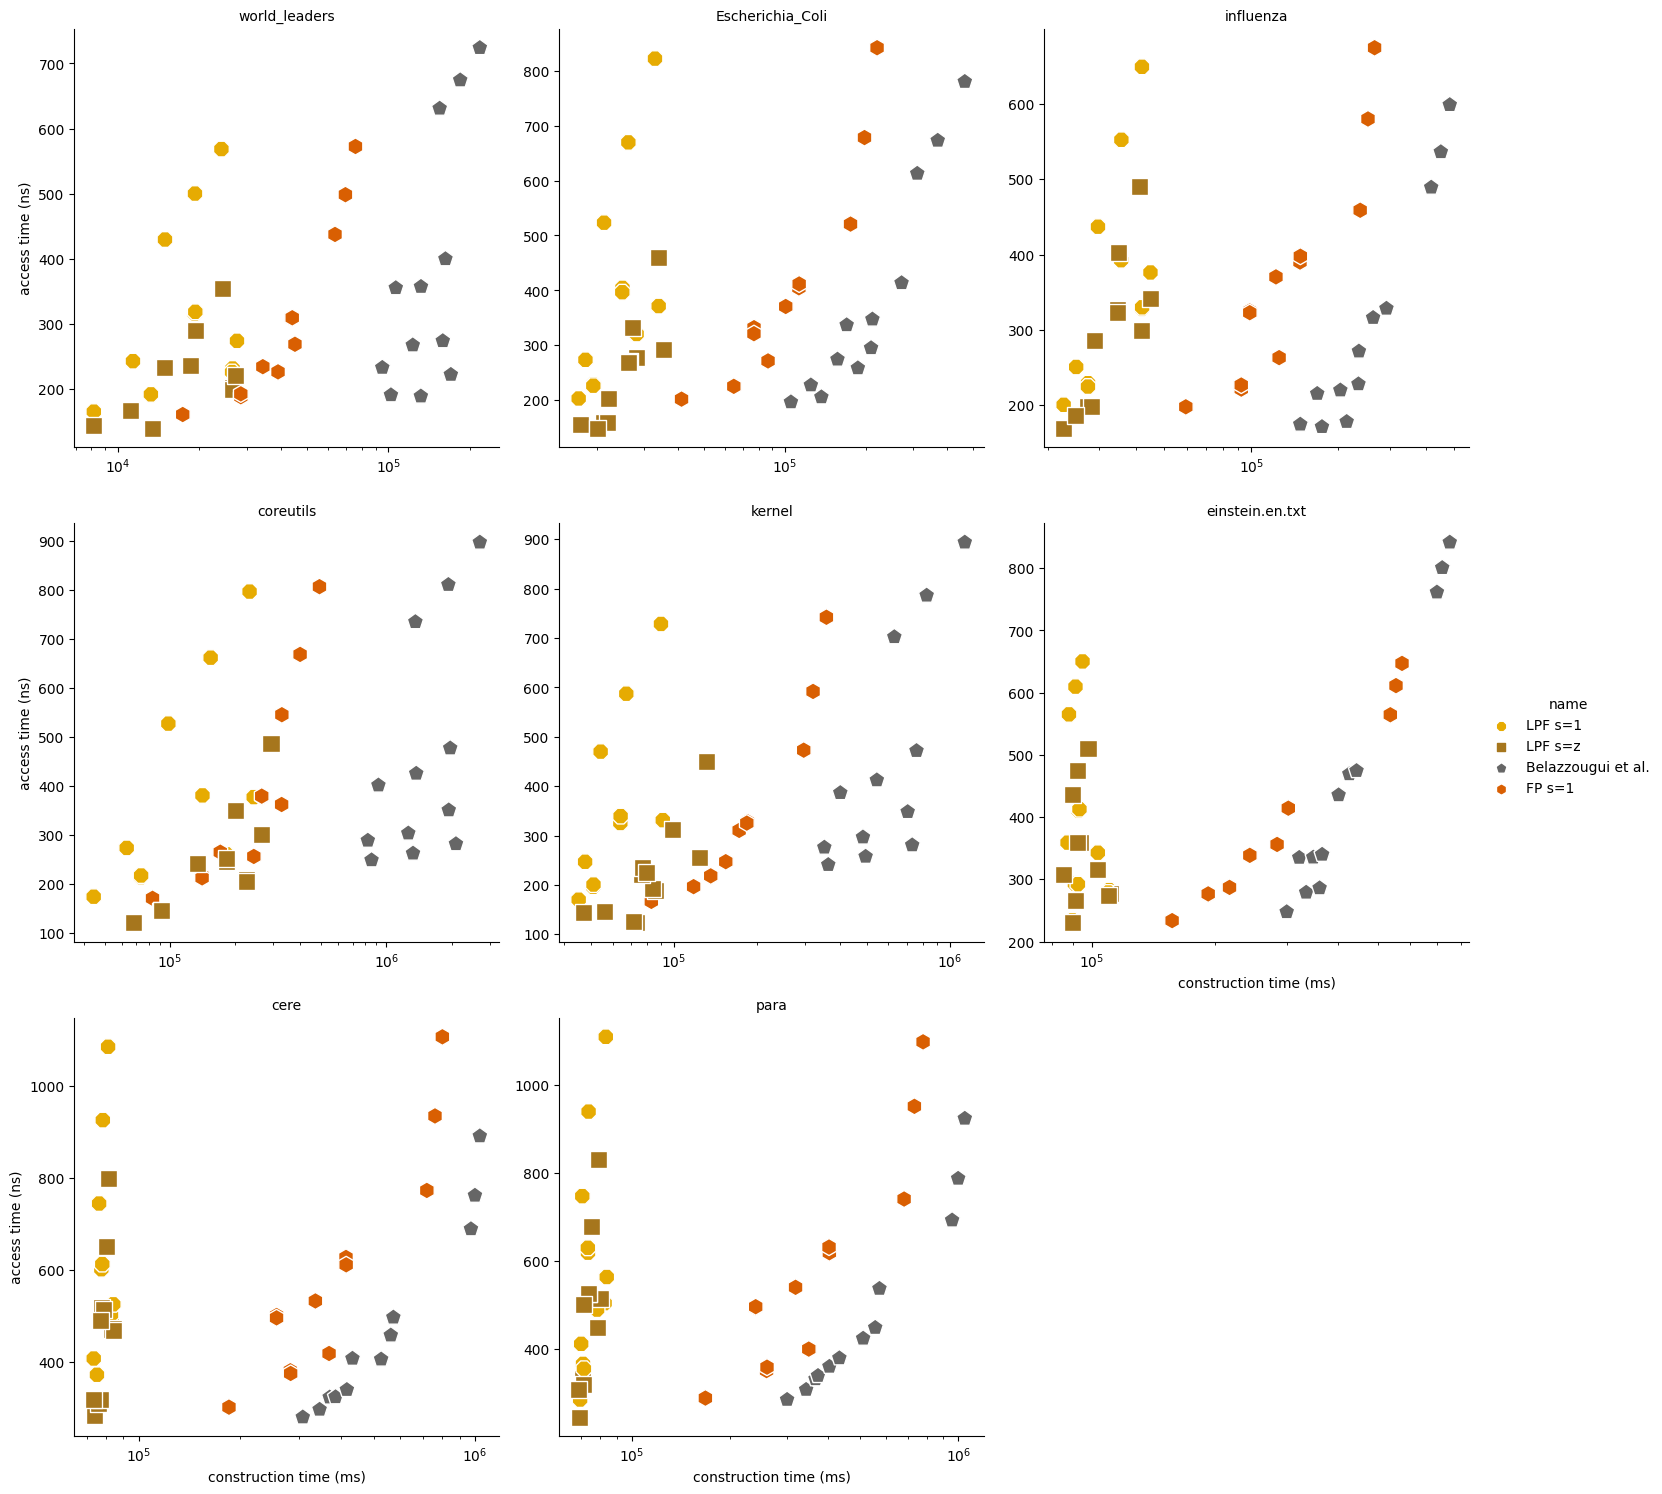

In [15]:
theo_speed_rank_log = sns.relplot(x='constr_time_rs', y='rank_avg', data=theoonly, col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': False, 'sharex': False})
theo_speed_rank_log.set_ylabels('access time (ns)')
theo_speed_rank_log.set_xlabels('construction time (ms)')
theo_speed_rank_log.set(xscale="log")
theo_speed_rank_log.set_titles("{col_name}")
plt.savefig("theo_speed_rank_log.pdf")

In [16]:
theo_speed_rank_log = sns.relplot(x='constr_time_rs', y='select_avg', data=df[(df.id == 0) |(df.id == 11) | (df.id == 12) | (df.id == 6) | (df.id == 7)], col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': False, 'sharex': False})
theo_speed_rank_log.set_ylabels('select time (ns)')
theo_speed_rank_log.set_xlabels('construction time (ms)')
theo_speed_rank_log.set(xscale="log")
theo_speed_rank_log.set_titles("{col_name}")
plt.savefig("theo_speed_select_log.pdf")

In [17]:
theo_speed_size_log_rs = sns.relplot(x='constr_time_rs', y='bpSrs', data=df[(df.id == 0) |(df.id == 11) | (df.id == 12) | (df.id == 6) | (df.id == 7)], col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': False, 'sharex': False})
theo_speed_size_log_rs.set_ylabels('Bits per Symbol')
theo_speed_size_log_rs.set_xlabels('construction time (ms)')
theo_speed_size_log_rs.set(xscale="log")
theo_speed_size_log_rs.set_titles("{col_name}")
plt.savefig("theo_speed_size_log_rs.pdf")

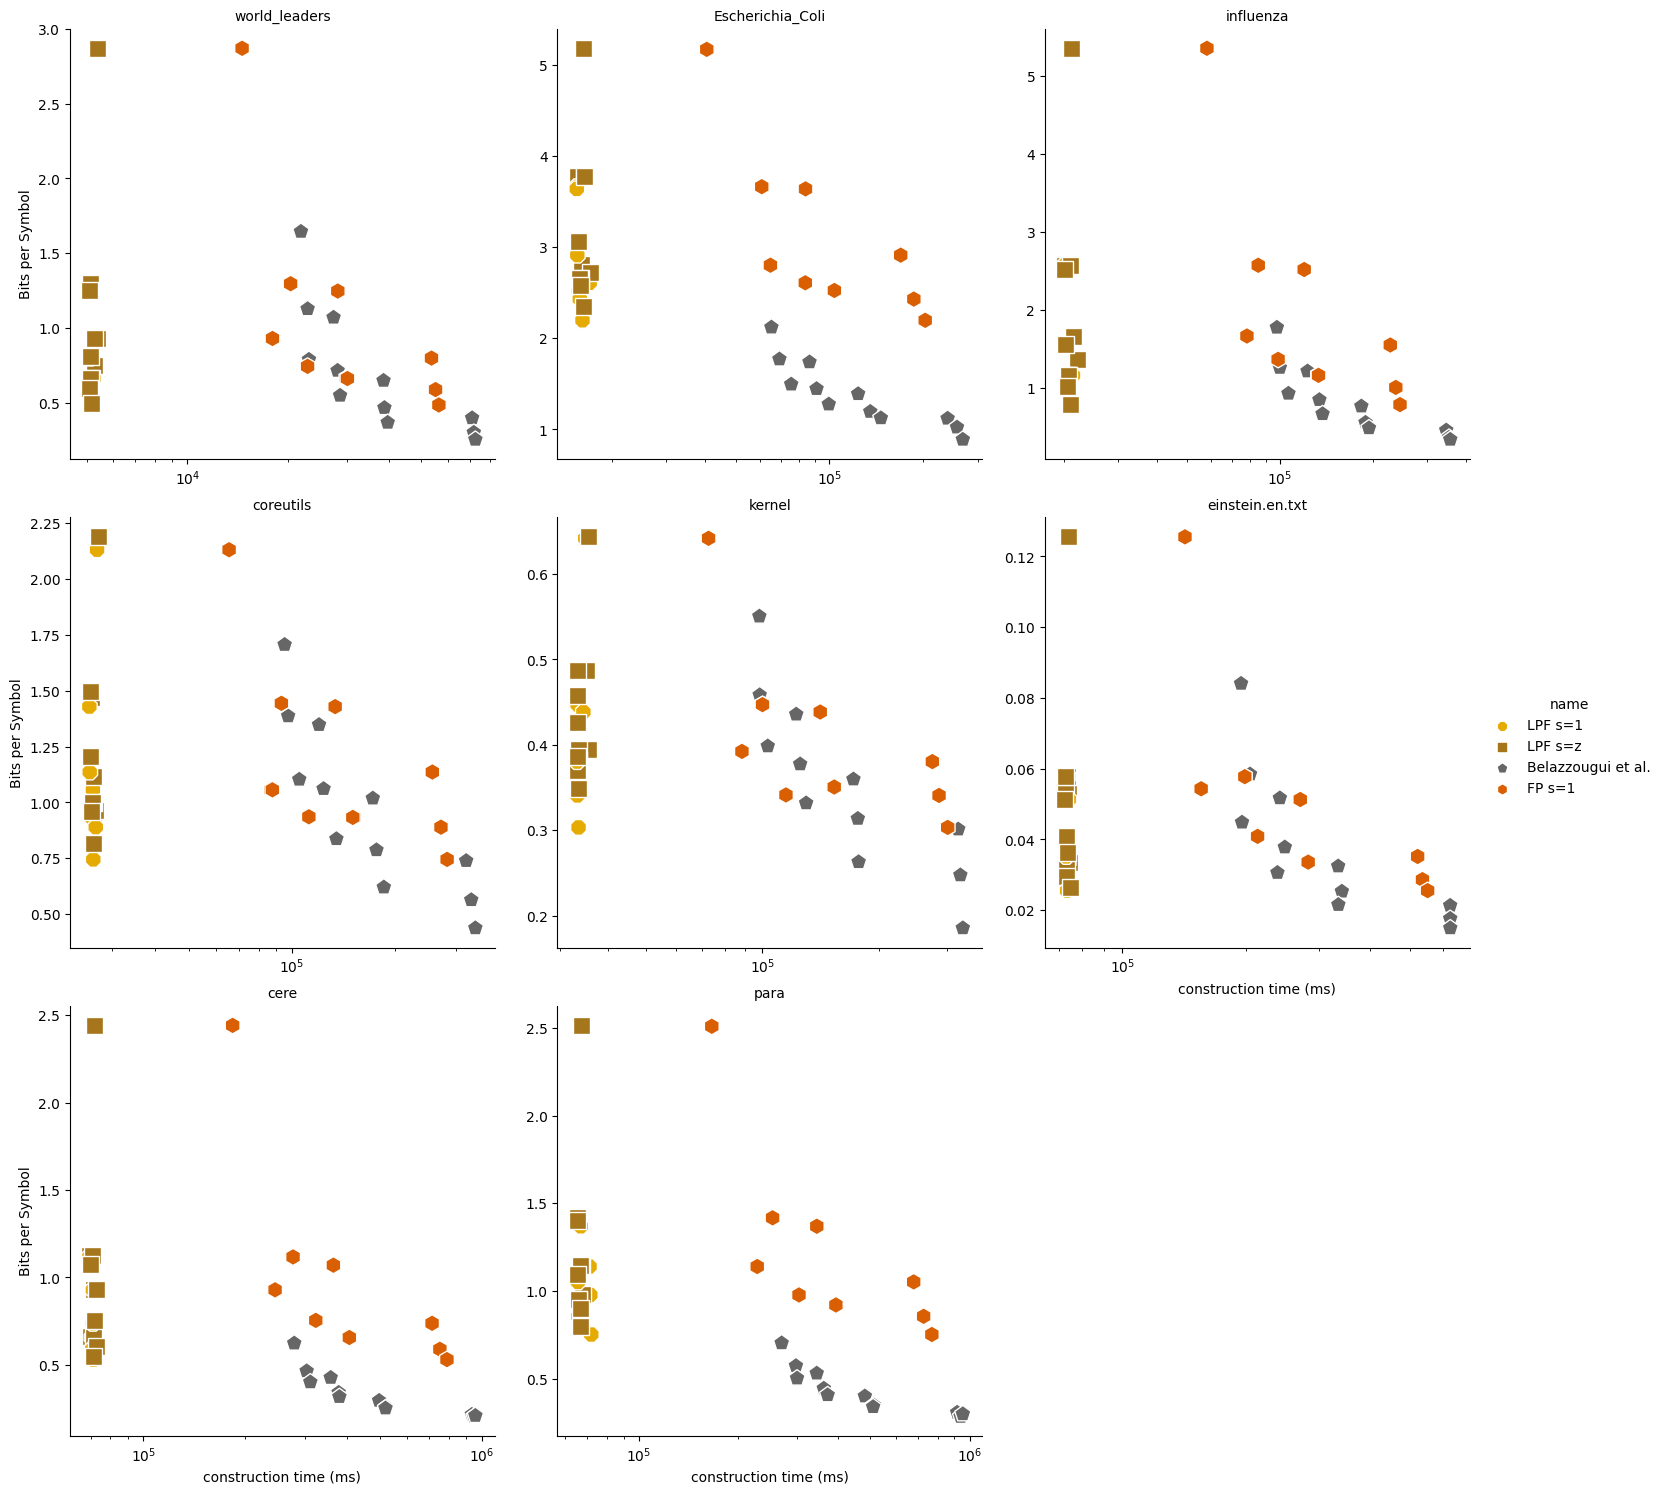

In [18]:
theo_speed_size_log = sns.relplot(x='constr_time', y='bpS', data=df[(df.id == 0) |(df.id == 11) | (df.id == 12) | (df.id == 6) | (df.id == 7)], col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': False, 'sharex': False})
theo_speed_size_log.set_ylabels('Bits per Symbol')
theo_speed_size_log.set_xlabels('construction time (ms)')
theo_speed_size_log.set(xscale="log")
theo_speed_size_log.set_titles("{col_name}")
plt.savefig("theo_speed_size_log.pdf")

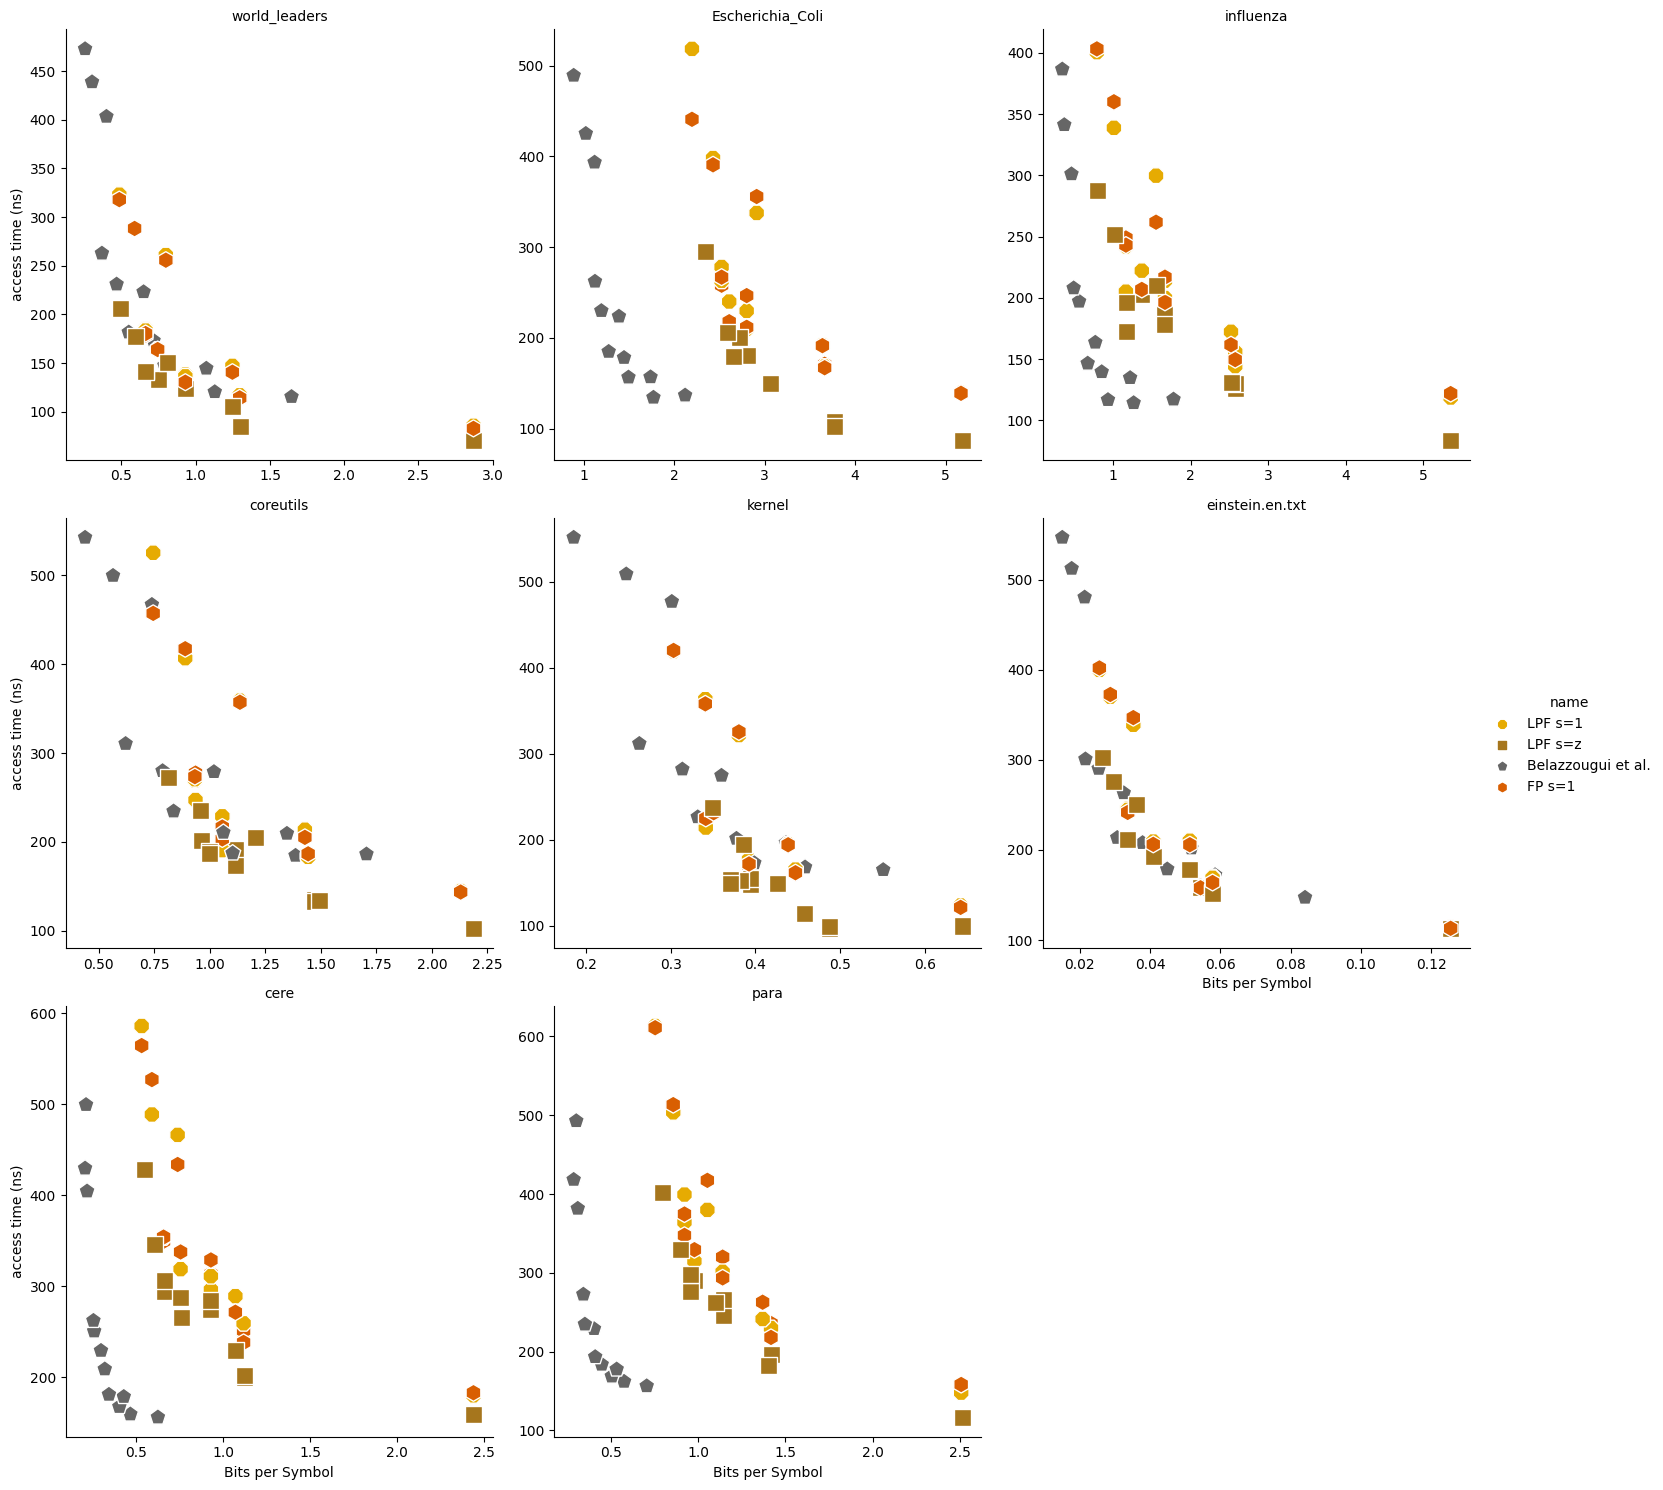

In [19]:
theo_size_access = sns.relplot(x='bpS', y='access_avg', data=df[(df.id == 0) |(df.id == 11) | (df.id == 12) | (df.id == 6) | (df.id == 7)], col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': False, 'sharex': False})
theo_size_access.set_ylabels('access time (ns)')
theo_size_access.set_xlabels('Bits per Symbol')
theo_size_access.set_titles("{col_name}")
plt.savefig("theo_size_access.pdf")

In [20]:
theo_size_access = sns.relplot(x='bpSrs', y='select_avg', data=df[(df.id == 0) |(df.id == 11) | (df.id == 12) | (df.id == 6) | (df.id == 7)], col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': False, 'sharex': False})
theo_size_access.set_ylabels('select time (ns)')
theo_size_access.set_xlabels('Bits per Symbol')
theo_size_access.set_titles("{col_name}")
plt.savefig("theo_size_select.pdf")

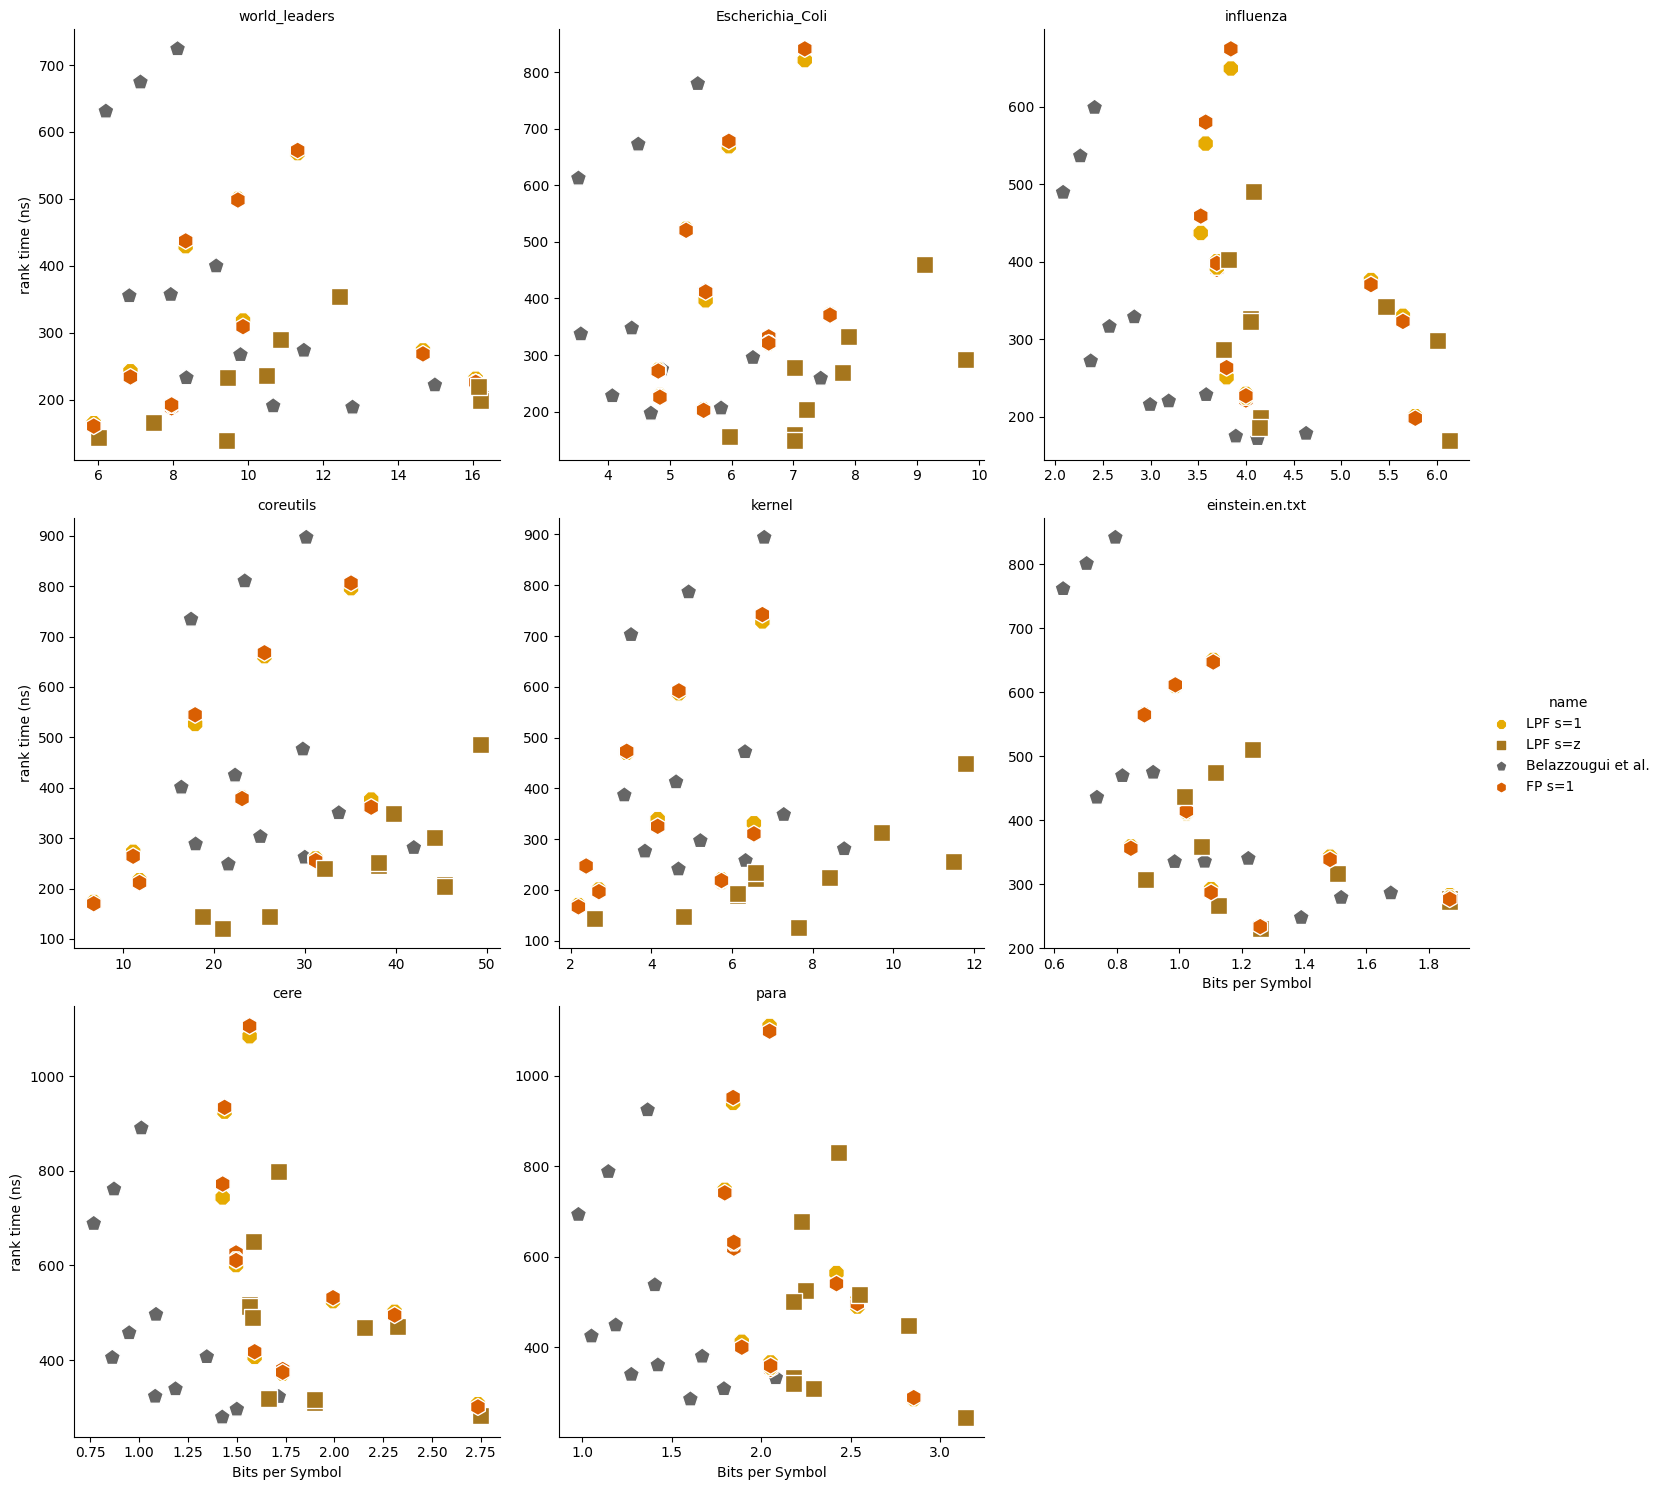

In [21]:
theo_size_access = sns.relplot(x='bpSrs', y='rank_avg', data=df[(df.id == 0) |(df.id == 11) | (df.id == 12) | (df.id == 6) | (df.id == 7)], col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': False, 'sharex': False})
theo_size_access.set_ylabels('rank time (ns)')
theo_size_access.set_xlabels('Bits per Symbol')
theo_size_access.set_titles("{col_name}")
plt.savefig("theo_size_rank.pdf")

In [22]:
speed_size = sns.relplot(x='constr_time', y='bpS', data=df, col='text_id',
    col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': False, 'sharex': False})
speed_size.set_ylabels('Bits per Symbol')
speed_size.set_xlabels('construction time (ms)')


In [23]:
# df_new = df.copy()
# sns.heatmap(df_new.corr())

In [24]:
# df
# def draw_heatmap(*args, **kwargs):
#     data = kwargs.pop('data')
#     d = data.pivot(index=args[1], columns=args[0], values=args[2])
#     sns.heatmap(d, **kwargs)
# fg = sns.FacetGrid(df_new, col='text_id', row='id')
# fg.map_dataframe(draw_heatmap, 't', 'l', 'constr_time', cbar=False, square = False)

In [25]:
que_size = sns.relplot(x='bpS', y='access_avg', data=df, col='text_id', col_wrap=3, hue="id",
                       style="id", s=100,facet_kws={'sharey': False, 'sharex': False})
que_size.set_ylabels('access time (ns)')
que_size.set_xlabels('Bits per Symbol')

In [26]:
que_size = sns.relplot(x='rank_avg', y='access_avg', data=df, col='text_id', col_wrap=3, hue="id",
                       style="id", s=100,facet_kws={'sharey': False, 'sharex': False})
que_size.set_ylabels('access time (ns)')
que_size.set_xlabels('rank time')

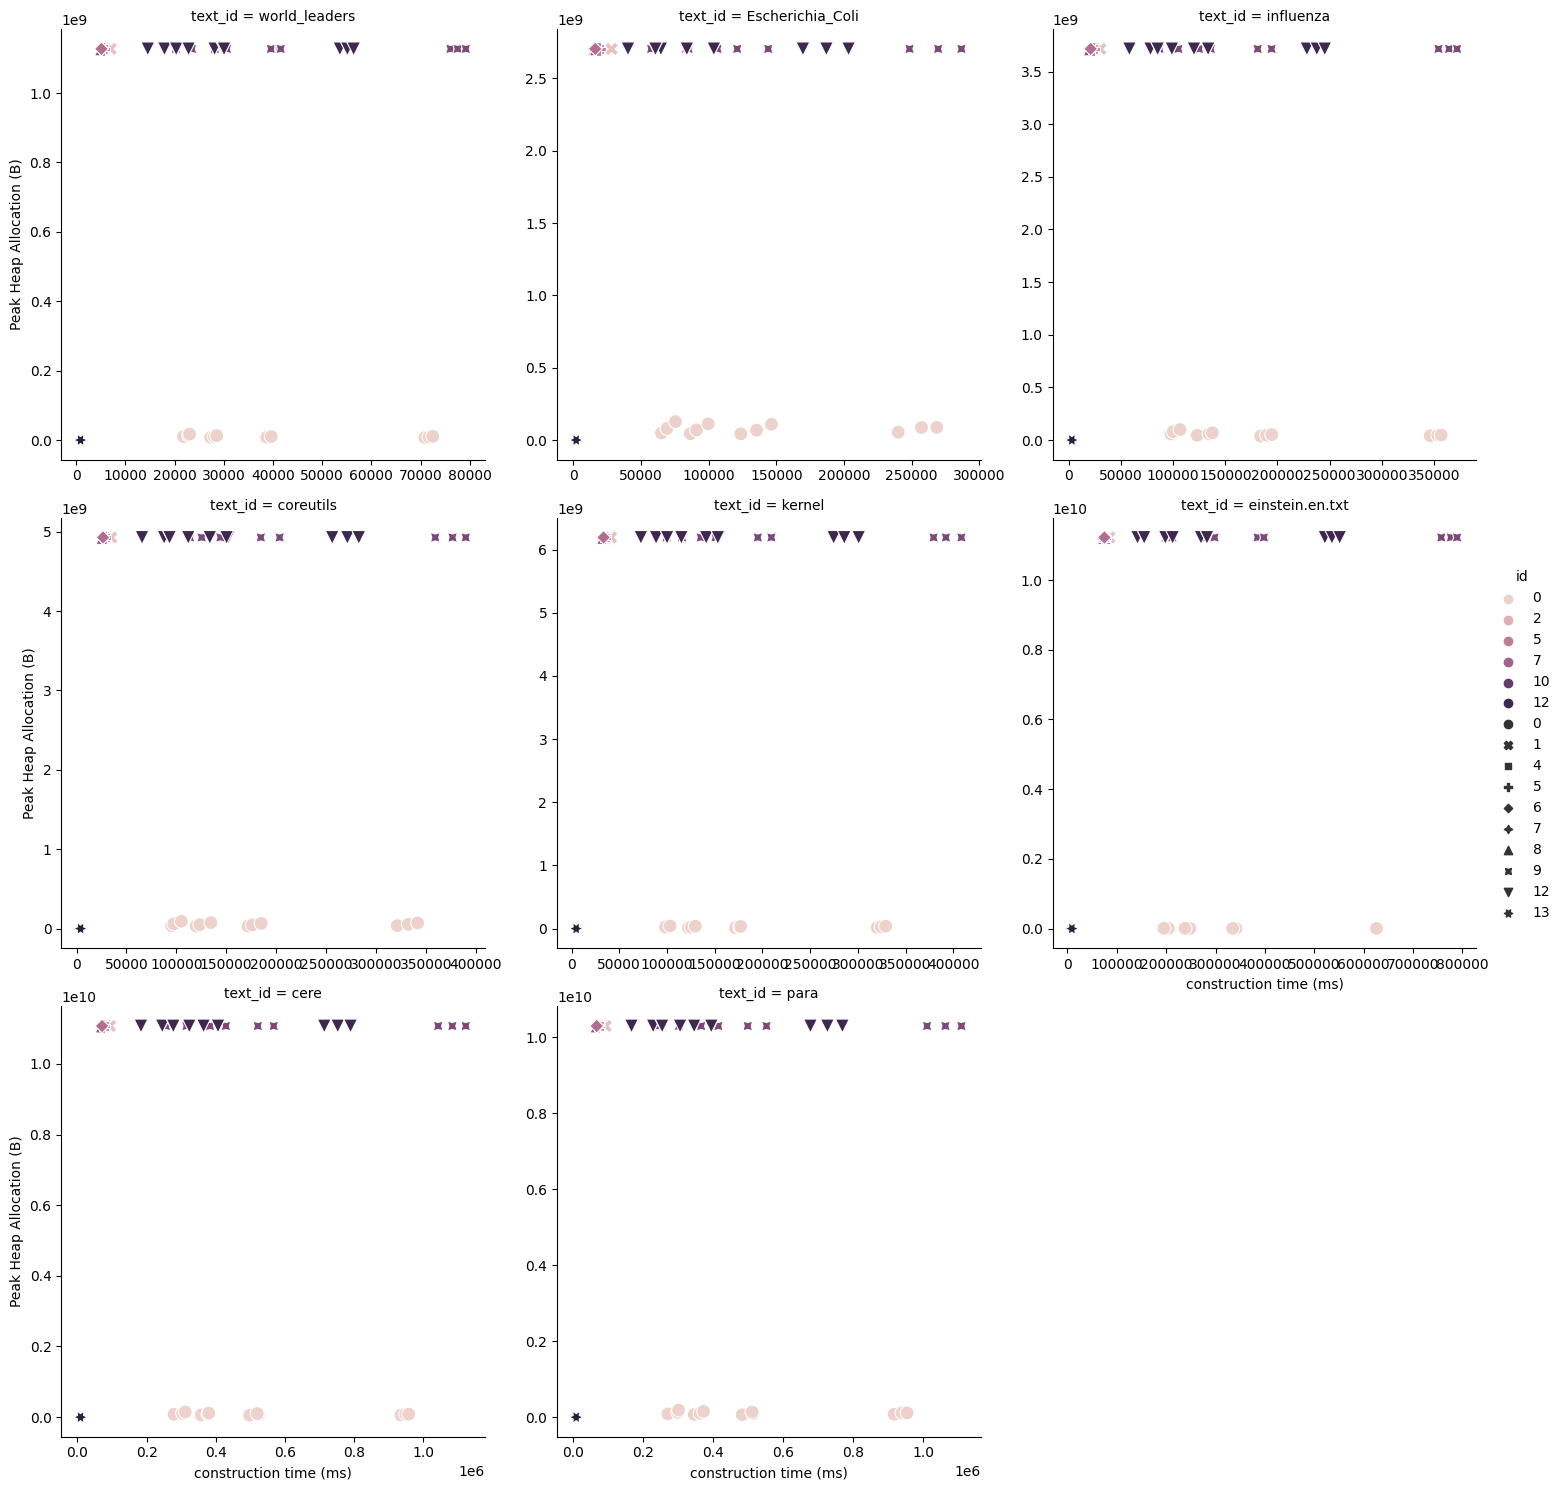

In [27]:

size_size = sns.relplot(x='constr_time', y='peak_mem', data=df, col='text_id', col_wrap=3,
                        hue="id", style="id", s=100,facet_kws={'sharey': False, 'sharex': False})
size_size.set_ylabels('Peak Heap Allocation (B)')
size_size.set_xlabels('construction time (ms)')


In [28]:
size_size = sns.relplot(x='constr_time_rs', y='bpSrs', data=df, col='text_id', col_wrap=3,
                        hue="id", style="id", s=100,facet_kws={'sharey': False, 'sharex': False})
speed_size_log.set_ylabels('Bits per Symbol (includes rank)')
speed_size_log.set_xlabels('construction time (ms)')
speed_size_log.set(xscale="log")

NameError: name 'speed_size_log' is not defined

In [ ]:
size_size = sns.relplot(x='constr_time_rs', y='bpSrs', data=df, col='text_id', col_wrap=3,
                        hue="id", style="id", s=100,facet_kws={'sharey': False, 'sharex': False})
speed_size_log.set_ylabels('Bits per Symbol (includes rank)')
speed_size_log.set_xlabels('construction time (ms)')

In [ ]:
que_size = sns.relplot(x='bpSrs', y='rank_avg', data=df, col='text_id', col_wrap=3, hue="id",
                       style="id", s=100,facet_kws={'sharey': False, 'sharex': False})
que_size.set_ylabels('rank time (ns)')
que_size.set_xlabels('Bits per Symbol')